In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats

from math import sqrt

In [2]:
matplotlib.rcParams['figure.max_open_warning'] = 32

In [3]:
rng = np.random.default_rng()

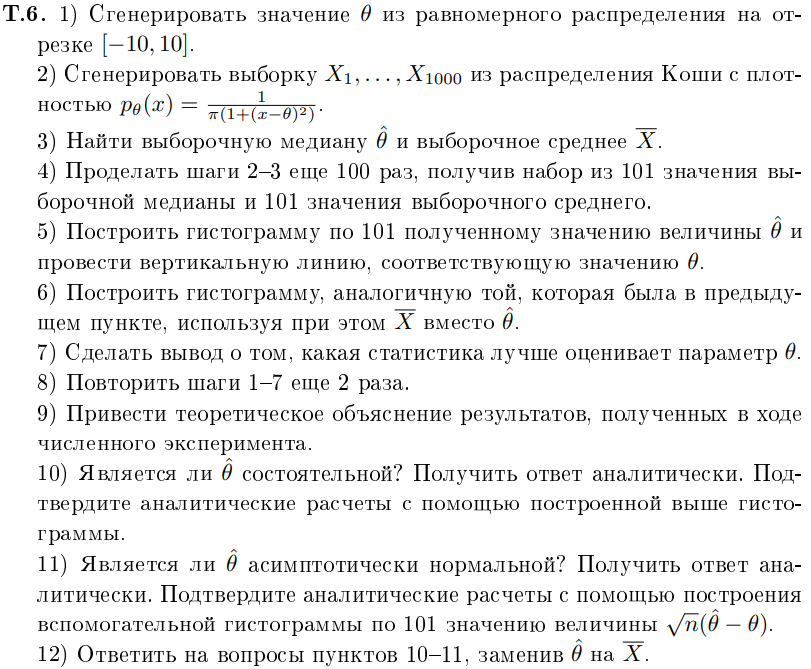

# Теоретическое дополнение

## Теормин

Оценка $\widehat\theta_n = \widehat\theta(X_1, \dots, X_n)$ называется **состоятельной**, если $\widehat\theta_n \stackrel{P}{\to} \theta$, то есть:

$\:\:\: \lim\limits_{n \to \infty} \mathbb{P}(|\widehat\theta_n - \theta| > \varepsilon) = 0 \:\:\: \forall \varepsilon > 0.$

Cостоятельность означает, что с ростом размера выборки всё менее вероятны хоть сколько нибудь значимые отклонения оценки от истинного значения параметра.

Оценка $\widehat\theta_n$ **асимптотически нормальна**, если $\frac{\widehat{\theta}_n - \theta}{\sqrt{\mathbb V \widehat{\theta}_n}} \stackrel{D}{\to} \mathcal N(0,1)$, т.е.

$\:\:\: \lim\limits_{n\to\infty}\mathbb P\Big(\frac{\widehat{\theta}_n - \theta}{\sqrt{\mathbb V \widehat{\theta}_n}} \leqslant z\Big) = \mathbb \Phi(z).$



## Состоятельность и асимптотическая нормальность $\hat{\theta}$:

В условиях теоремы об асимптотической нормальности выборочной квантили выполнено:

$ \sqrt{n}(\hat{\mu} - z_{\frac{1}{2}}) \overset{d_{\theta}}{\longrightarrow} \mathcal{N}(0, \frac{p(1 - p)}{(F'(z_{\frac{1}{2}}))^2})$

Распределение Коши подходит под условия теоремы: плотность непрерывна и положительна в точке $\theta$.

Тогда $\theta$ - это медиана распределения $\implies$
выборочная медиана будет асимптотически нормальной оценкой:

$\sqrt{n}(\hat{\mu} - z_{\frac{1}{2}}) \overset{d_{\theta}}{\longrightarrow} \mathcal{N}(0, \frac{1}{4p_{\theta}^{2}(\theta)}) = \mathcal{N}(0, \frac{\pi^2}{4})$

Если оценка асимптотически нормальная, то она состоятельная:

$\hat{\theta_{n}}(X) - \theta = \frac{1}{\sqrt{n}} \sqrt{n}(\hat{\theta_{n}}(X) - \theta) \overset{d_{\theta}}{\longrightarrow} 0 * \mathcal{N}(0, \sigma^2(\theta)) \overset{Лемма \: Слуцкого}{=} 0$

Из сходимости по распределению к константе, следует сходимость по вероятности, а это и есть определение состоятельности.

## Состоятельность и асимптотическая нормальность $\overline{X}$:

$X_j$ ~ $C(1, \theta)$

$\varphi(X_j) = \mathop{\mathbb{E_{\theta}}} e^{it X_j} = \frac{1}{\pi} \int_{-\infty}^{+\infty} \frac{e^{itx}}{1 + (x - \theta)^2} dx = e^{i \theta t - t}$

$\varphi(\overline{X}) = \mathop{\mathbb{E_{\theta}}} e^{i\frac{\sum_j^n{X_j t}}{n}} = \mathop{\mathbb{E_{\theta}}} e^{it\frac{\sum_j^n{\theta}}{n} - \frac{\sum_j^n{t}}{n}} = e^{i \theta t - t} = \varphi({X_j}) \implies X_j \overset{d}{\longrightarrow} \overline{X}$

$F_{\overline{X}}(X) = \frac{1}{\pi} \arctan(x - \theta) + \frac{1}{2}$

$\mathbb{P_{\overline{X}}}(|\overline{X} - \theta| \geq \varepsilon) = \mathbb{P_{\overline{X}}}(\overline{X} - \theta \leq -\varepsilon) + \mathbb{P_{\overline{X}}}(\overline{X} - \theta \geq \varepsilon) \geq \frac{1}{\pi} \arctan(-\varepsilon) + \frac{1}{2} ⟶ \frac{1}{2} \neq 0$

Определение состоятельности не выполняется.

Так как отсутствует состоятельность, а асимптотическая нормальность ее влечет, то оценка не асимптотически нормальна.

# Вывод
Выборочное среднее не является *состоятельной* оценкой, а, следовательно, выборочная медиана **лучше**.

In [4]:
def plot_hist(est1:list[float], est1_title:str,
              est2:list[float], est2_title:str,
              theta:float):
  bins_strategy = 'auto'
  fig, axs = plt.subplots(1, 4, tight_layout=False, figsize=(16, 8))
  #fig.suptitle('')

  assert len(est1) == len(est2)
  n = len(est1)

  axs[0].set_title(est1_title)
  counts_est1, bins_est1 = np.histogram(est1, bins=bins_strategy)
  axs[0].stairs(counts_est1, bins_est1, fill=True, color='c')
  axs[0].axvline(x=theta, linewidth=1, color='r')

  asympt_est1 = [sqrt(n) * (theta_hat - theta) for theta_hat in est1]
  asympt_counts_est1, asympt_bins_est1 = np.histogram(asympt_est1, bins=bins_strategy)
  axs[1].stairs(asympt_counts_est1, asympt_bins_est1, fill=True, color='c')

  axs[2].set_title(est2_title)
  counts_est2, bins_est2 = np.histogram(est2, bins=bins_strategy)
  axs[2].stairs(counts_est2, bins_est2, fill=True, color='c')
  axs[2].axvline(x=theta, linewidth=1, color='b')

  asympt_est2 = [sqrt(n) * (theta_hat - theta) for theta_hat in est2]
  asympt_counts_est2, asympt_bins_est2 = np.histogram(asympt_est2, bins=bins_strategy)
  axs[3].stairs(asympt_counts_est2, asympt_bins_est2, fill=True, color='c')

In [5]:
class ParametricEstimation:

  def __init__(self, estimator=np.mean, name='Выборочное среднее'):
    self.estimator = estimator
    self.name = name

  def __call__(self, sample : list[float]):
    return self.estimator(sample)

  def get_name(self):
    return self.name

In [6]:
sample_mean = ParametricEstimation()
sample_median = ParametricEstimation(estimator=np.median, name='Выборочная медиана')

std_stats = (sample_median, sample_mean)

In [7]:
# type DistParams = tuple[float, float]

def get_sample(dist, params:tuple[bool, bool], theta, size:int):
  sample = []

  if params[0]:
    sample = dist.rvs(loc=theta, size=size)
  elif params[1]:
    sample = dist.rvs(scale=theta, size=size)
  else:
    sample = dist.rvs(size=size)

  return sample



def get_sample_statistics(size:int,
                          theta,
                          dist,
                          params:tuple[bool, bool],
                          est:tuple[ParametricEstimation, ParametricEstimation]):
  est_samples = []

  for theta_i in theta:
    sample_est1, sample_est2 = [], []

    for i in range(size):
      sample = get_sample(dist, params, theta_i, size=1000)

      sample_est1.append(est[0](sample))
      sample_est2.append(est[1](sample))

    plot_hist(sample_est1, est[0].get_name(), sample_est2, est[1].get_name(), theta_i)

    est_samples.append((theta_i, sample_est1, sample_est2))

  return est_samples


def comparing_estimations(dist,
                          params:tuple[bool, bool],
                          scope:tuple[int, int],
                          est:tuple[ParametricEstimation, ParametricEstimation]):
  est_samples = []
  low, high = scope

  for i in range(3):
    theta = rng.uniform(low=low, high=high, size=3)
    est_samples.extend(get_sample_statistics(size=101, theta=theta, dist=dist, params=params, est=est))

  return est_samples

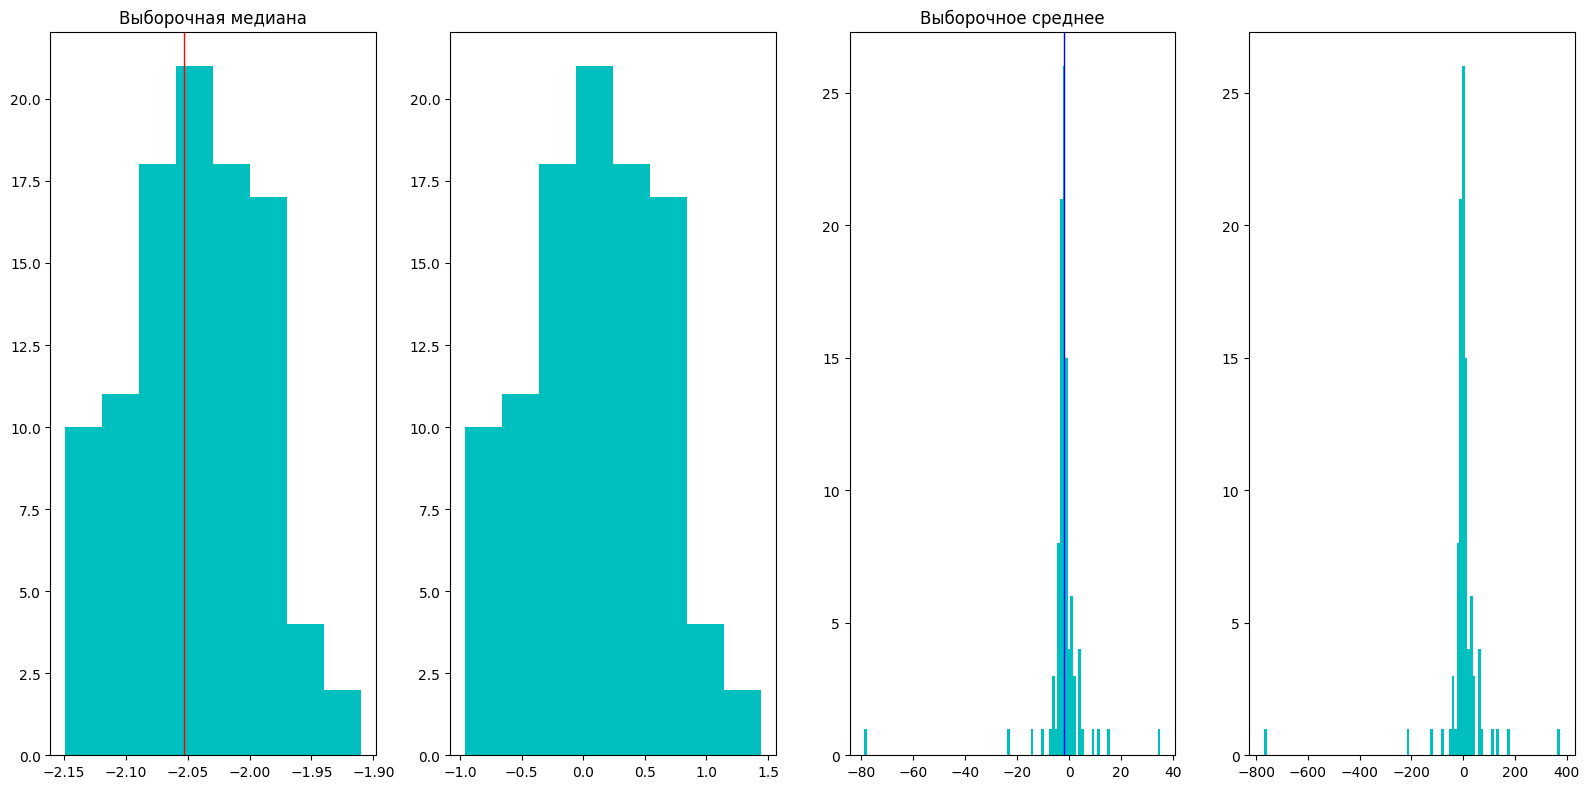

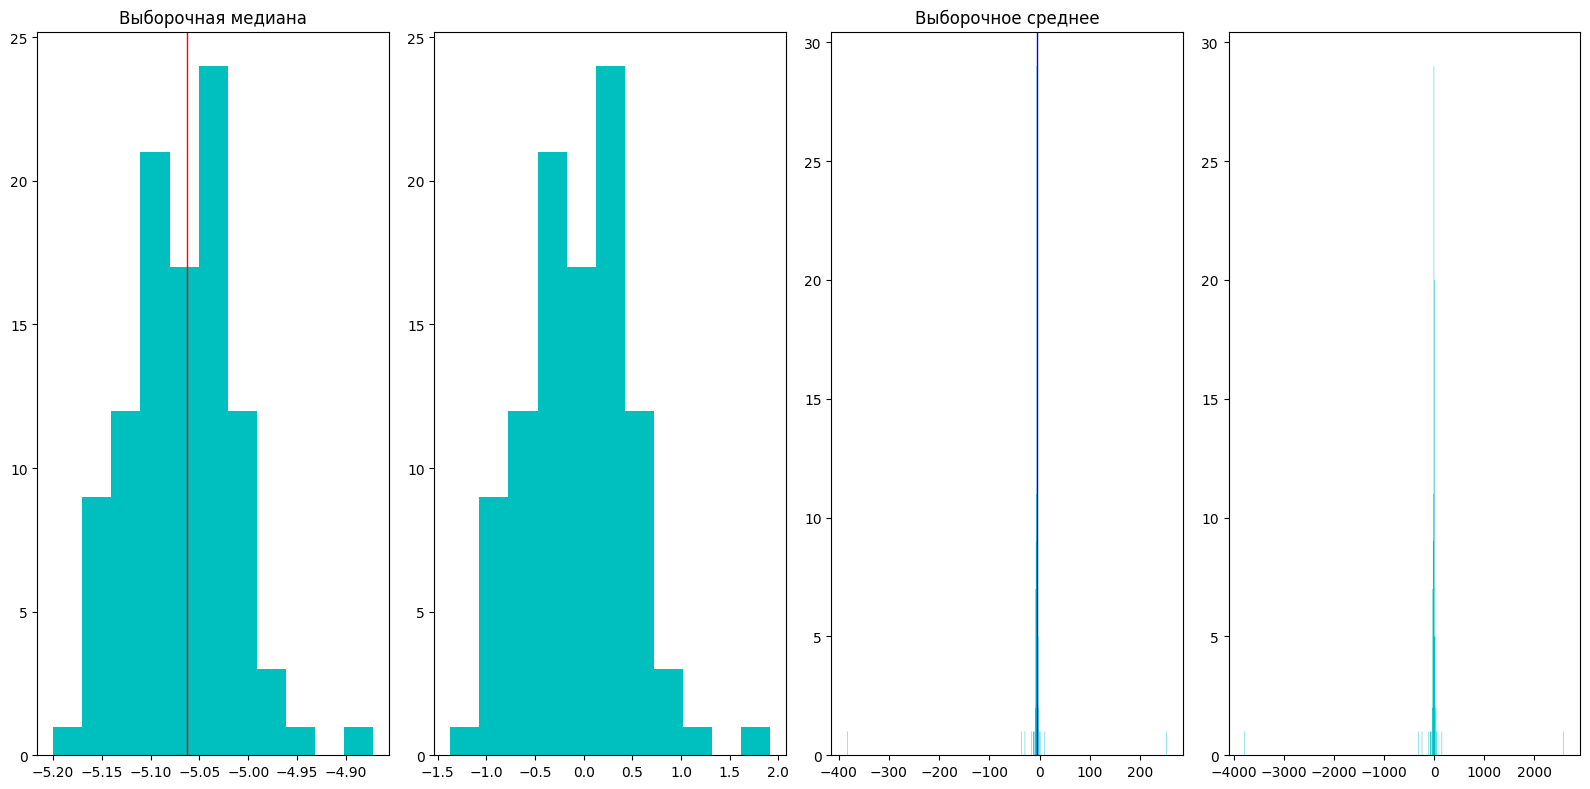

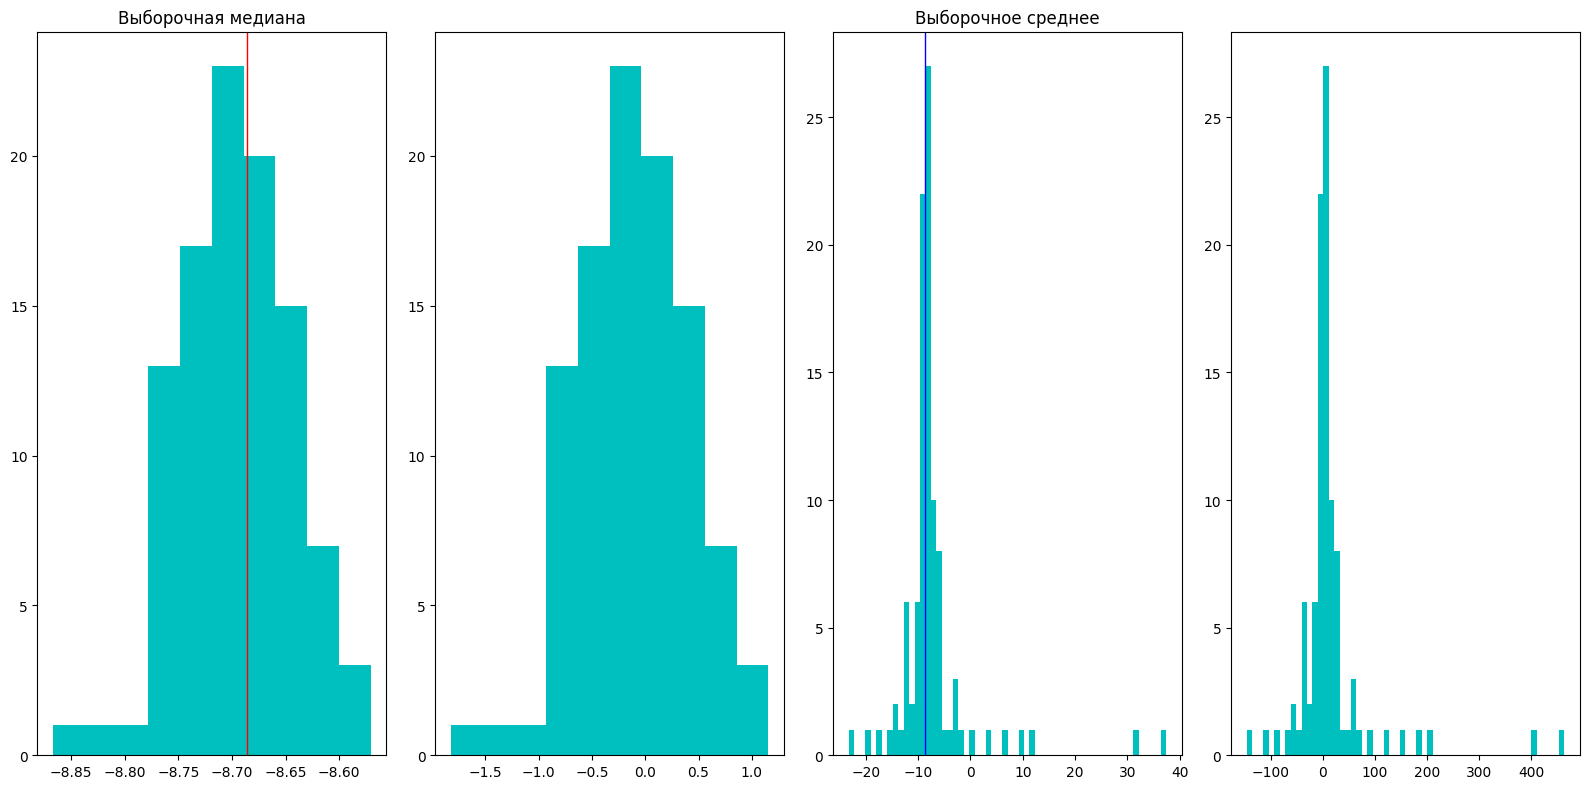

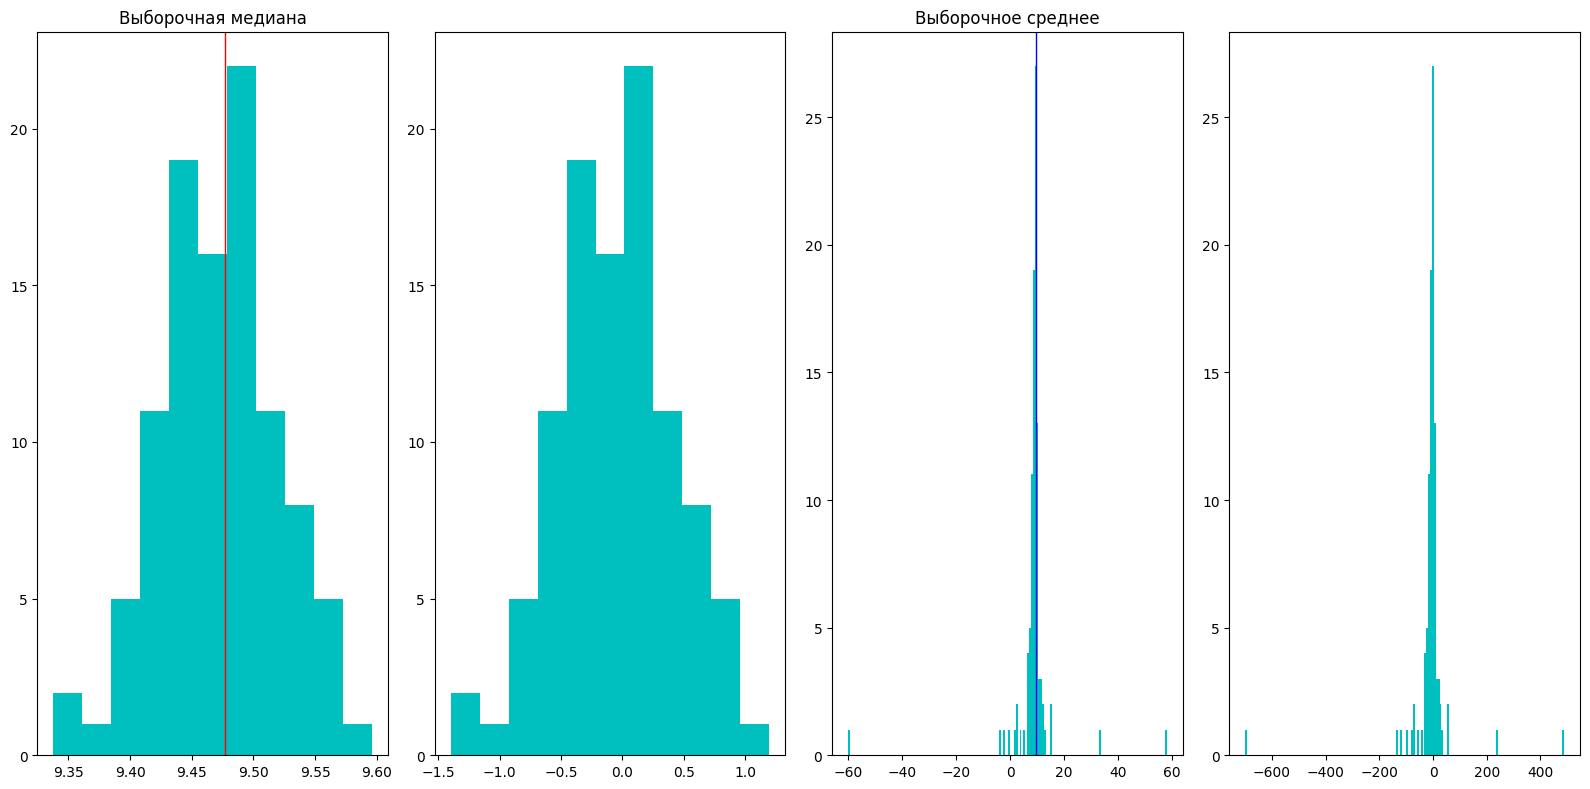

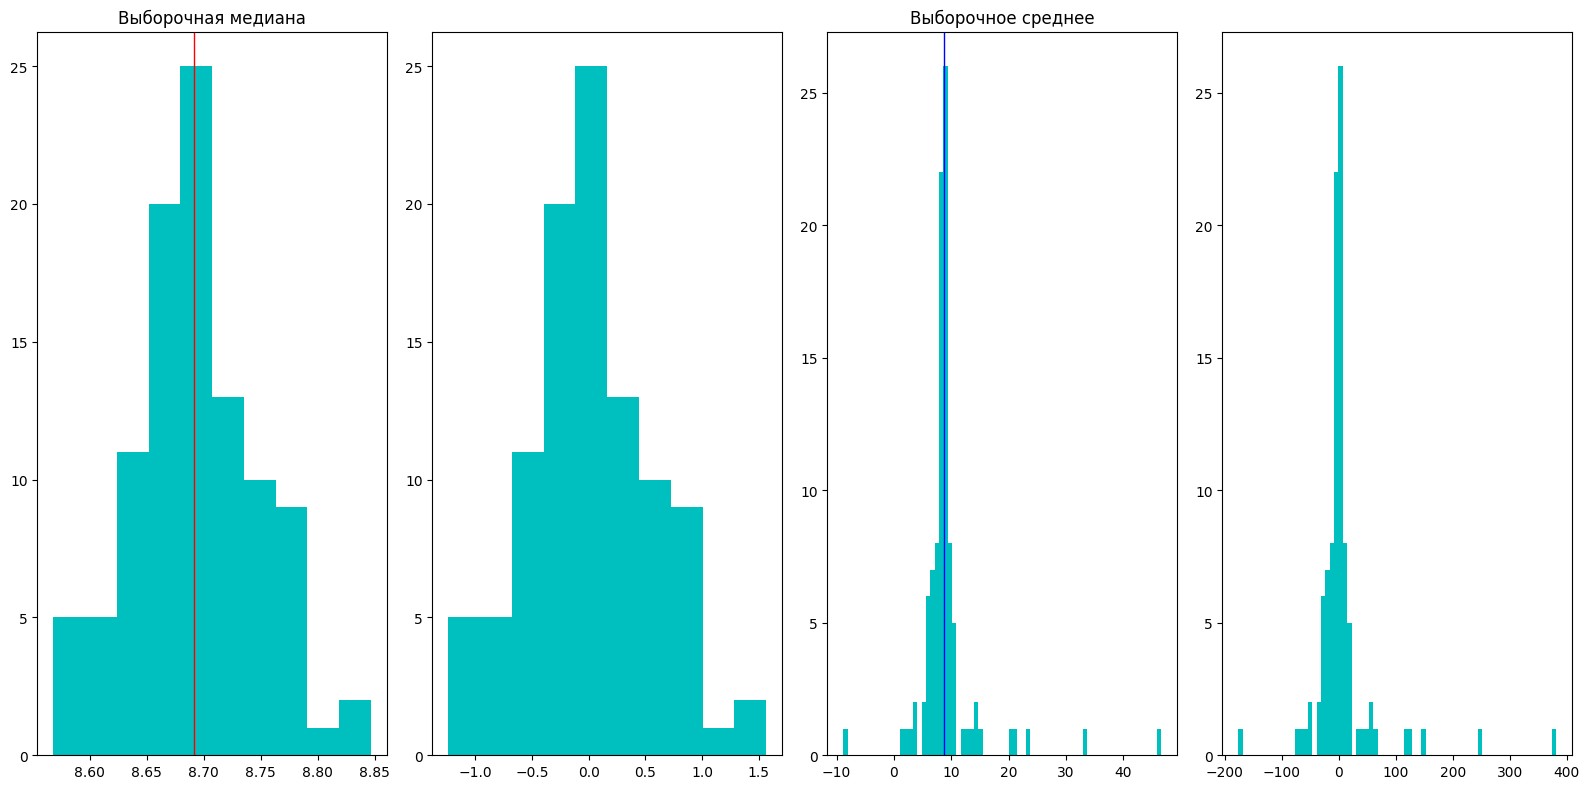

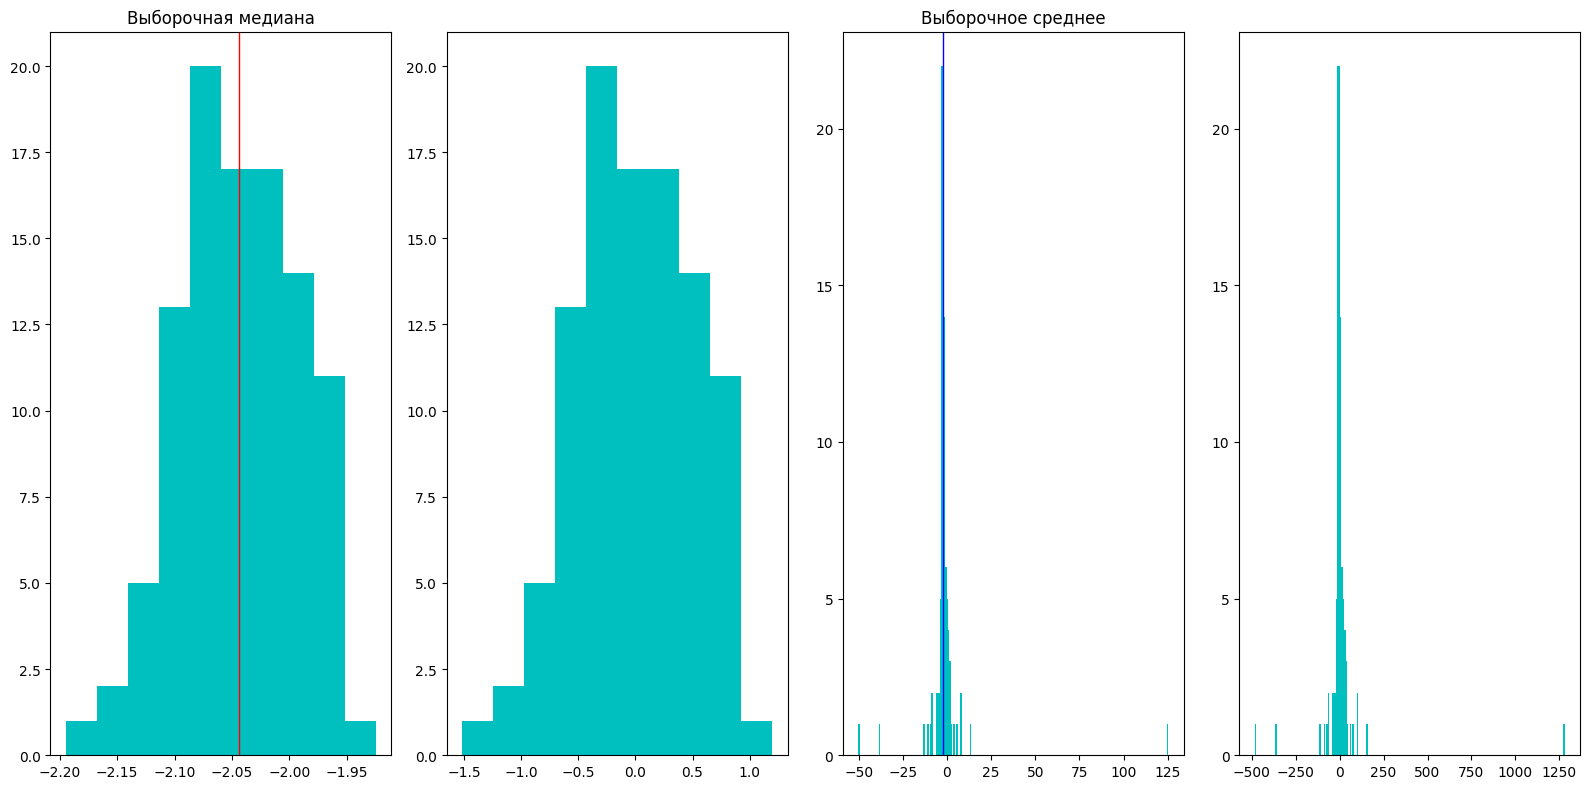

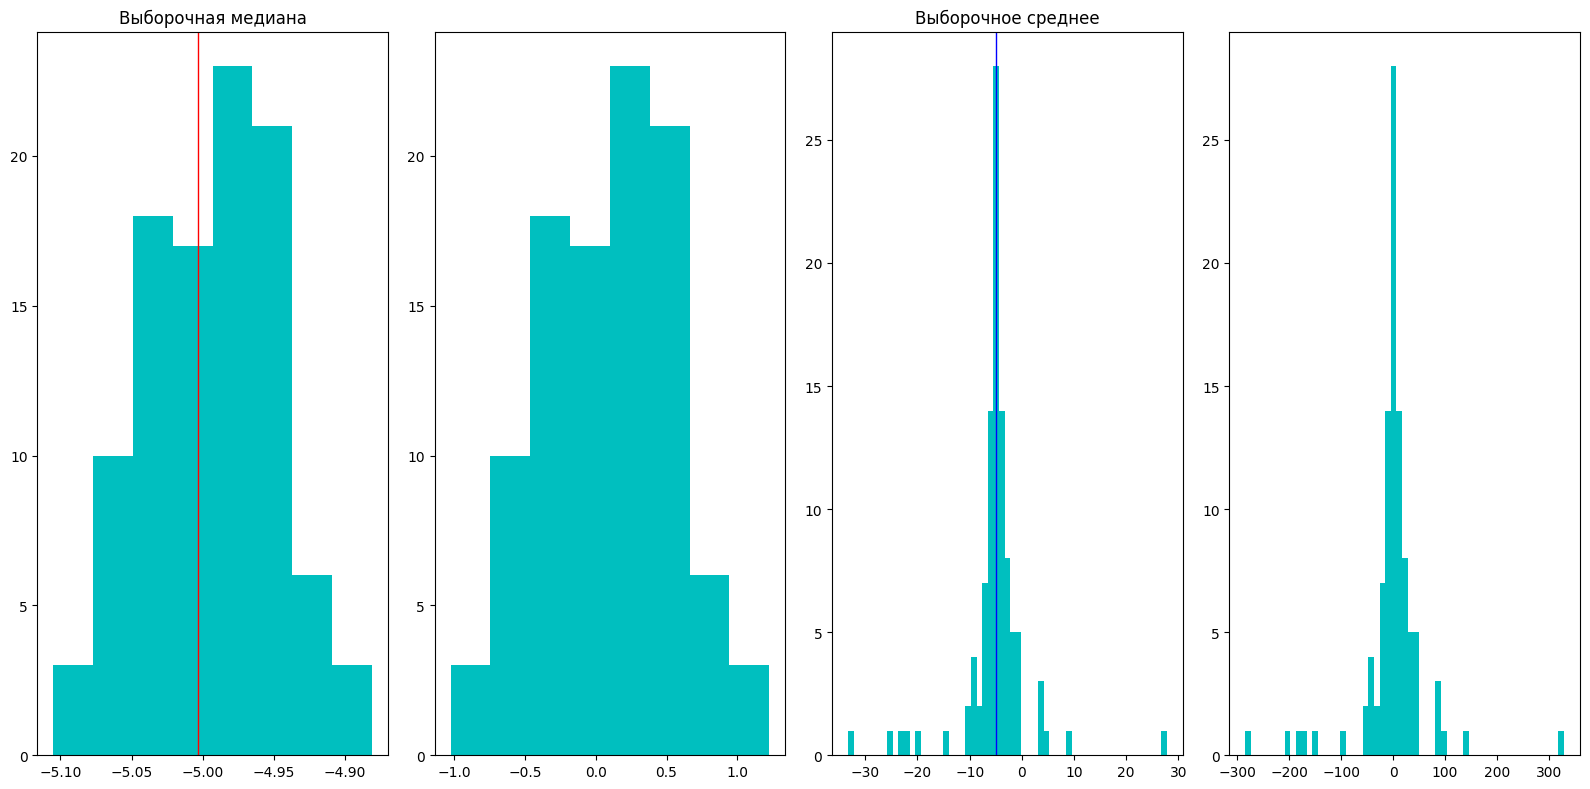

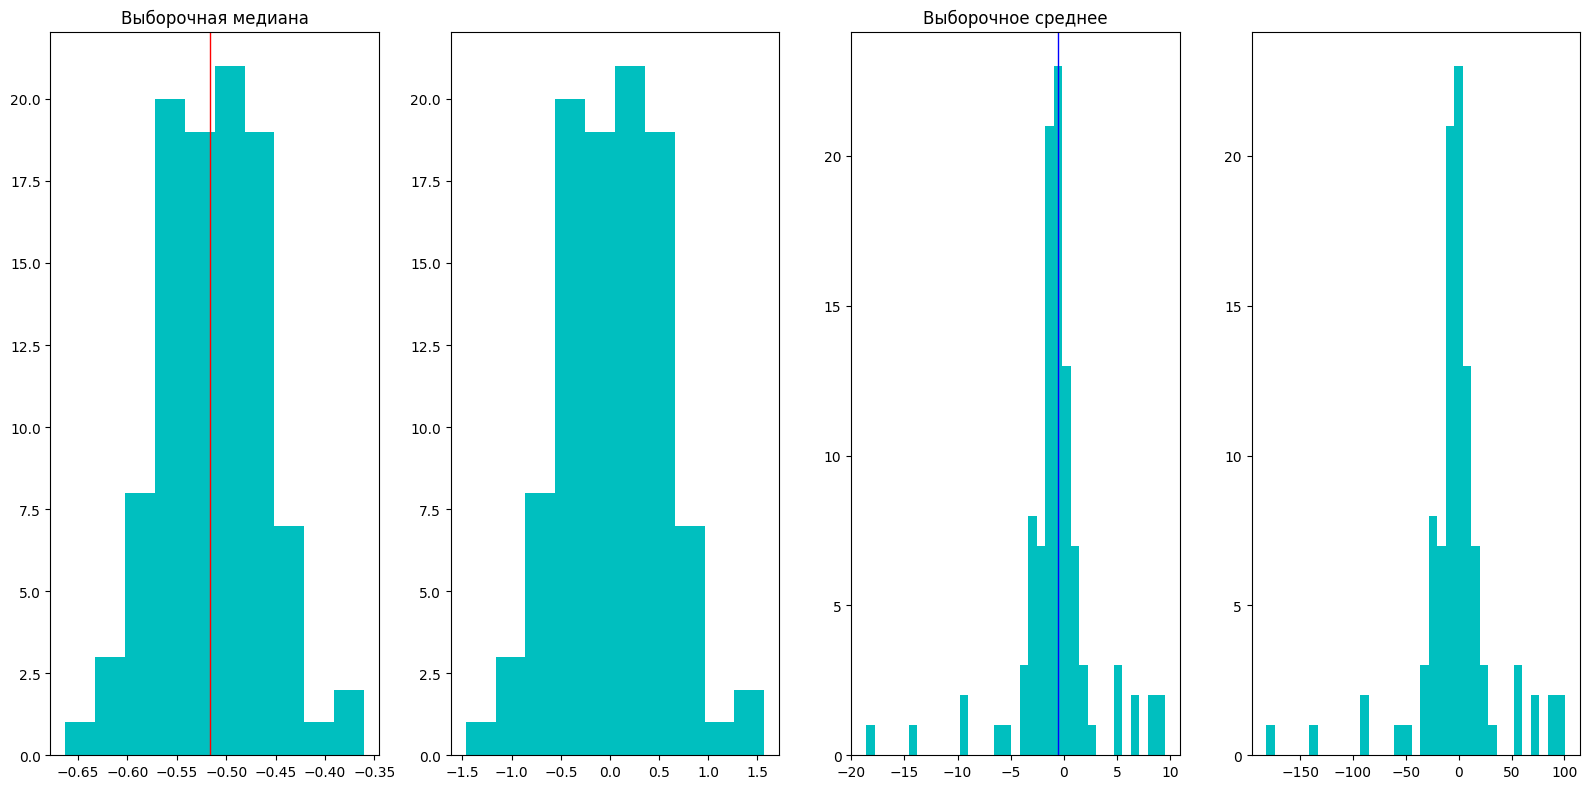

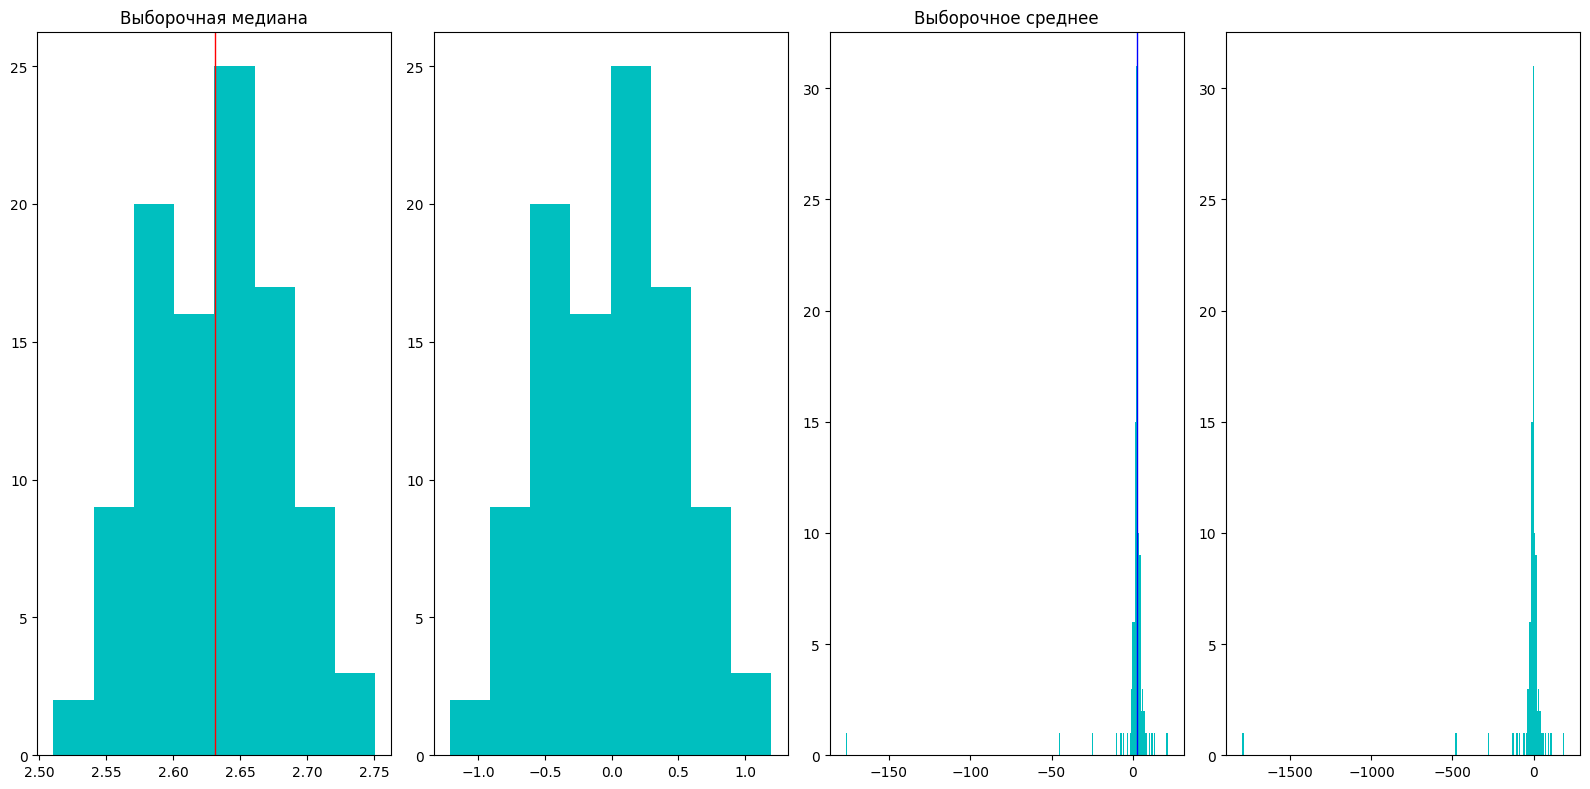

In [8]:
est_samples = comparing_estimations(dist=stats.cauchy, params=(True, False), scope=(-10, 10), est=std_stats)

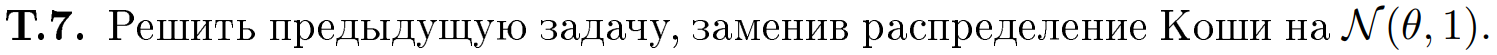

# Теоретическое дополнение

## Состоятельность и асимптотическая нормальность $\hat{\theta}$:

По теореме об асимптотической нормальности выборочной квантили получаем:

$\sqrt{n}(\hat{\mu} - z_{\frac{1}{2}}) \overset{d_{\theta}}{\longrightarrow} \mathcal{N}(0, \frac{1}{4p_{\theta}^{2}(\theta)}) = \mathcal{N}(0, \frac{\pi}{2})$

Если оценка асимптотически нормальная, то она состоятельная. (д-во в пред. задании)

## Состоятельность и асимптотическая нормальность $\overline{X}$:

По **З.Б.Ч.** $\overline{X} \overset{P}{\longrightarrow} \mathop{\mathbb{E}(X_1)} = \theta$,
а, следовательно, $\overline{X}$ является состоятельной оценкой для $\theta$.

Асимптотическая нормальность следует из **ЦПТ**:
$\sqrt{n}(\overline{X} - \theta) \overset{d}{\longrightarrow} \mathcal{N}(0, 1)$

<!-- Тк. $X_1, ... X_n$ н.о.р.с.в. ~ $\mathcal{N}(\theta, 1)$, то их сумма ... -->

# Вывод
**Выборочное среднее** имеет *меньшую* асимптотическую дисперсию (1 < $\frac{\pi}{2}$), а, следовательно, эта оценка *лучше*.

# Глобальный вывод по Т6 и Т7

**Выборочное среднее** часто является наилучшей оценкой, в частности, для матожидания, но если у распределения имеются тяжелые хвосты, то универсальным вариантом является медиана.

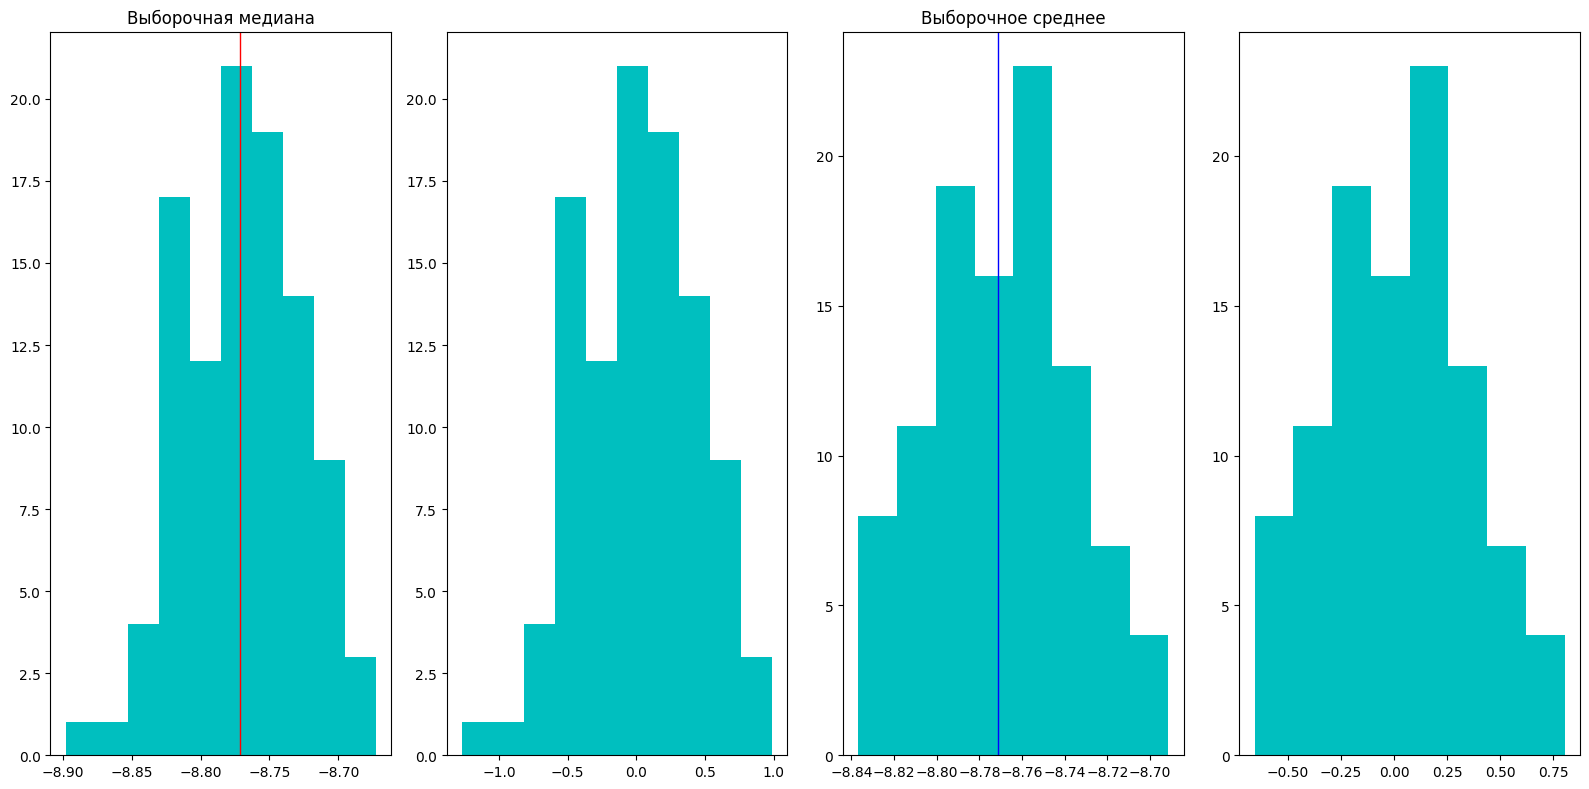

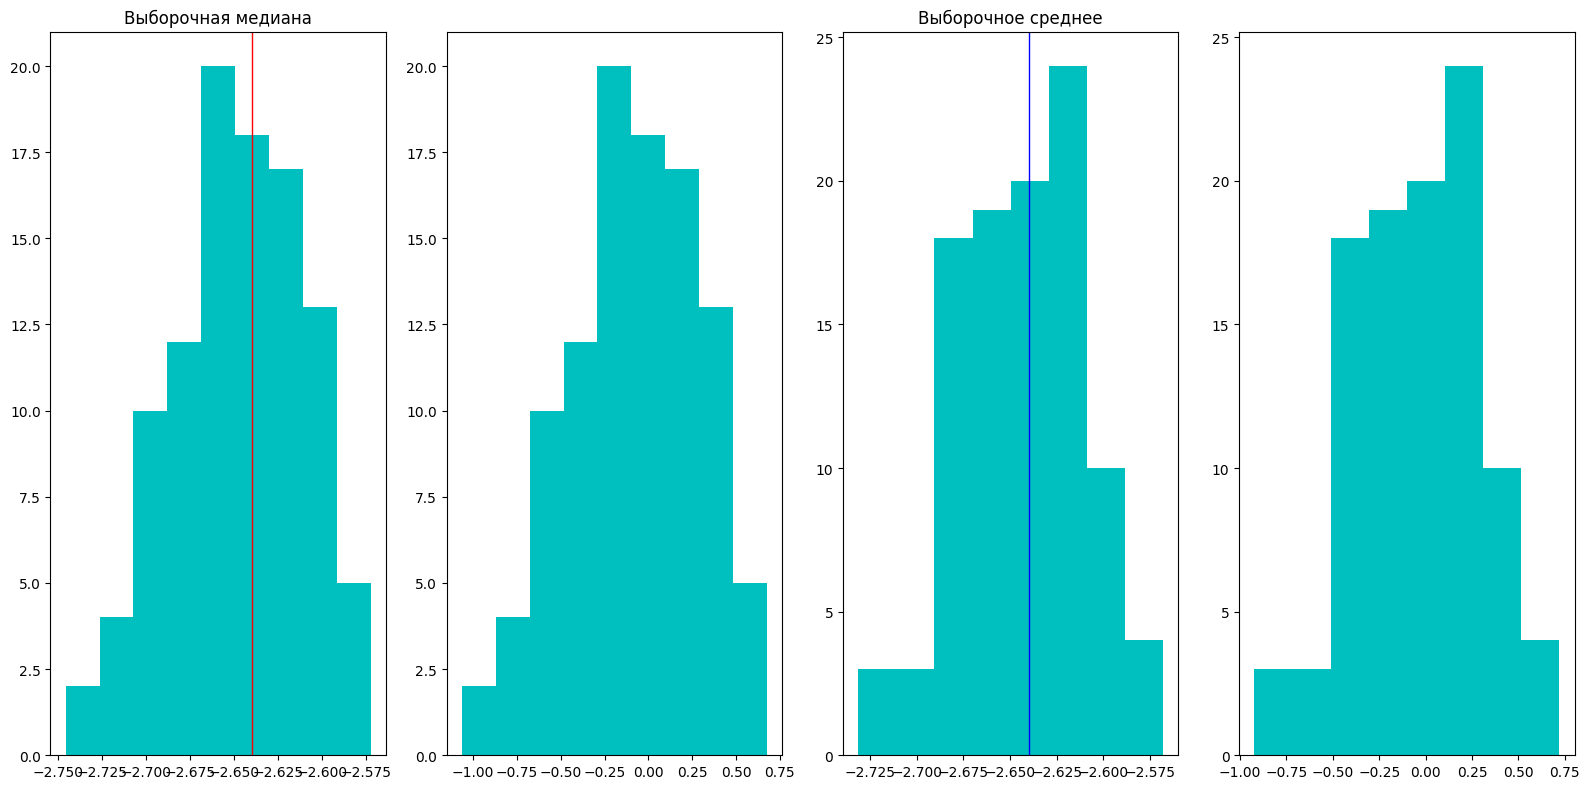

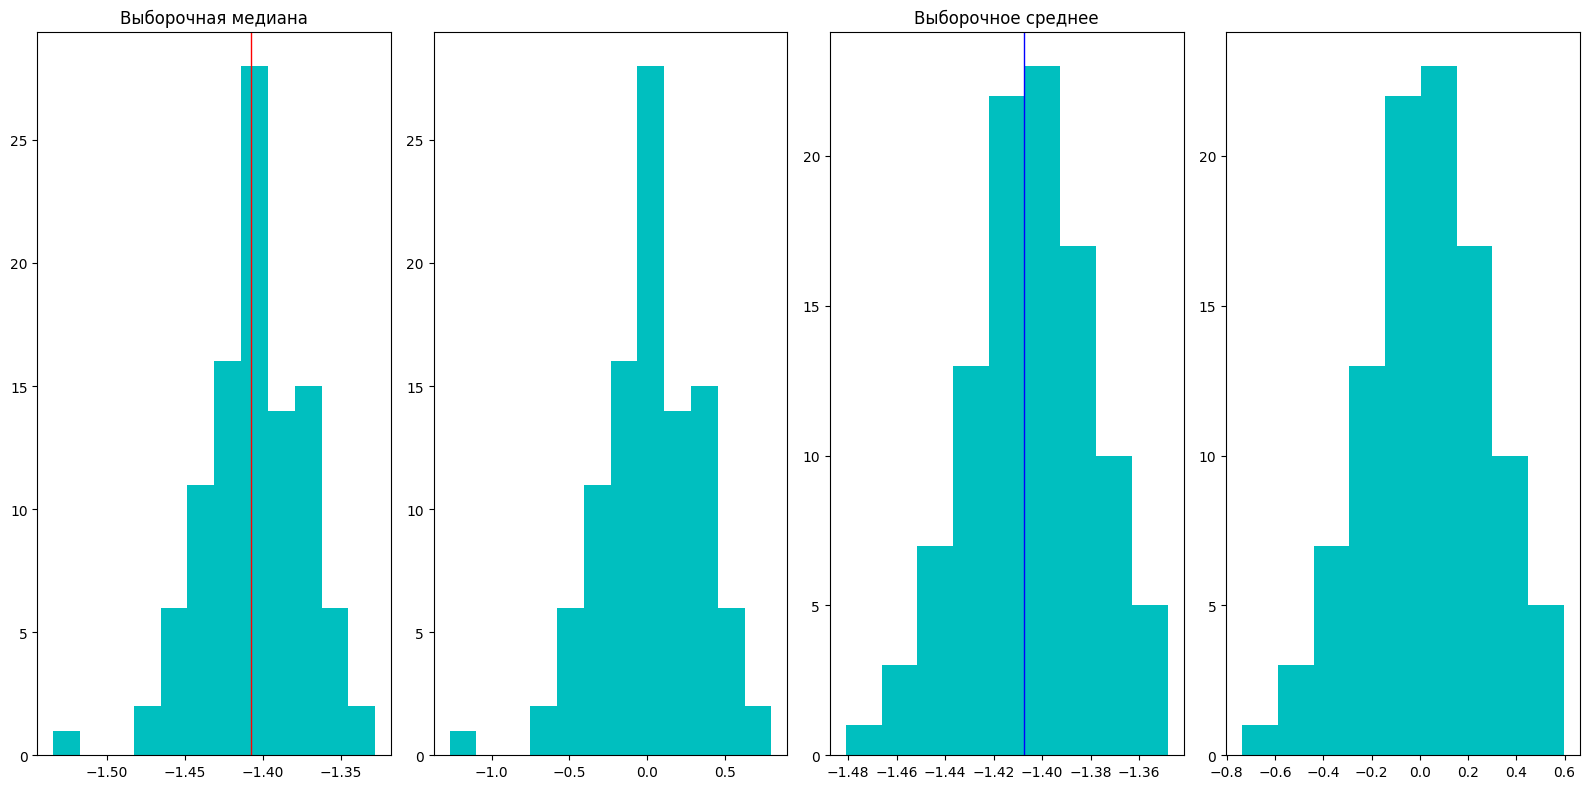

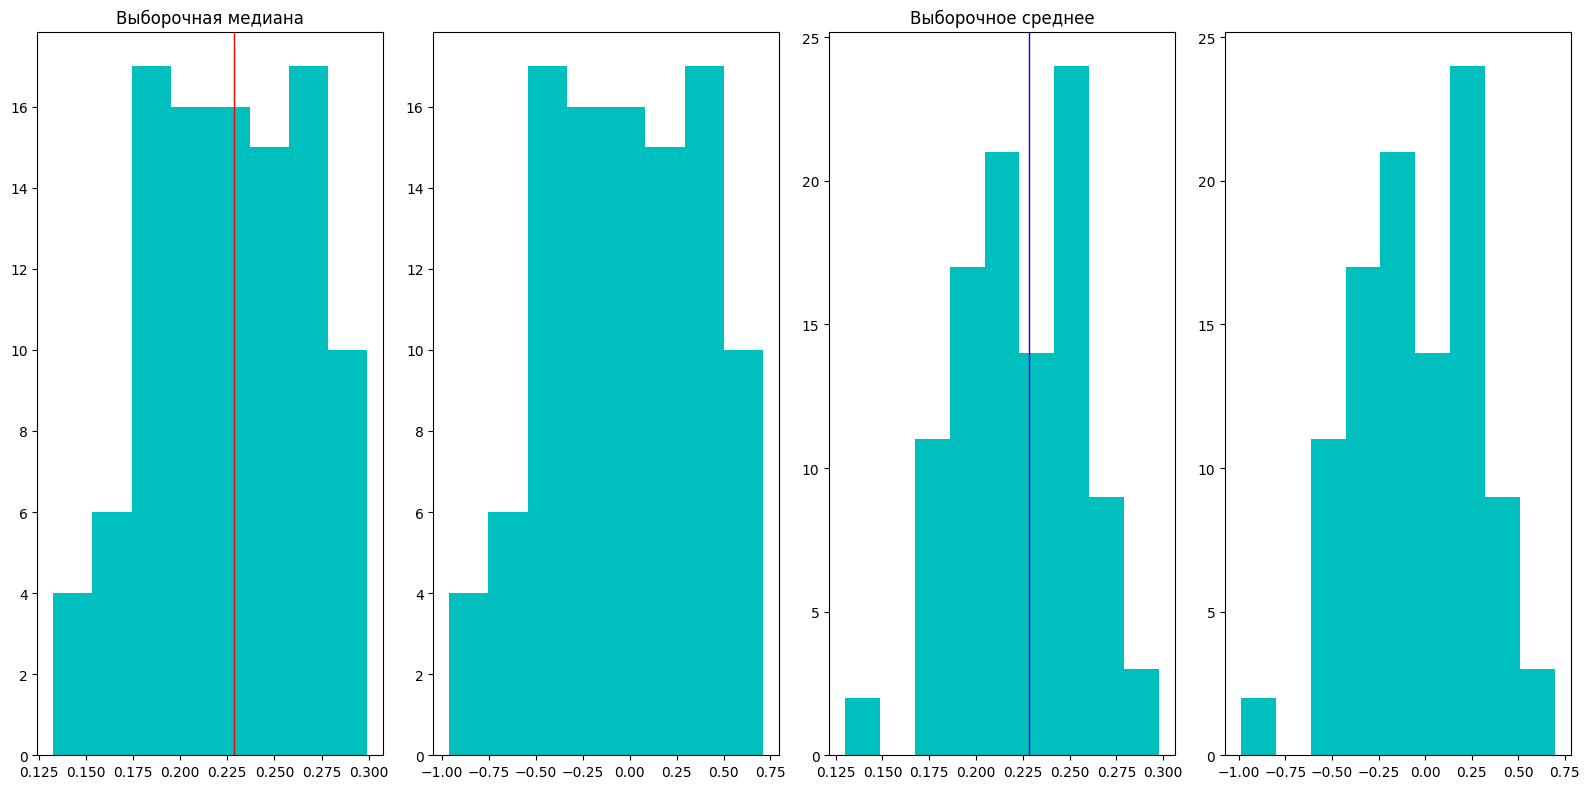

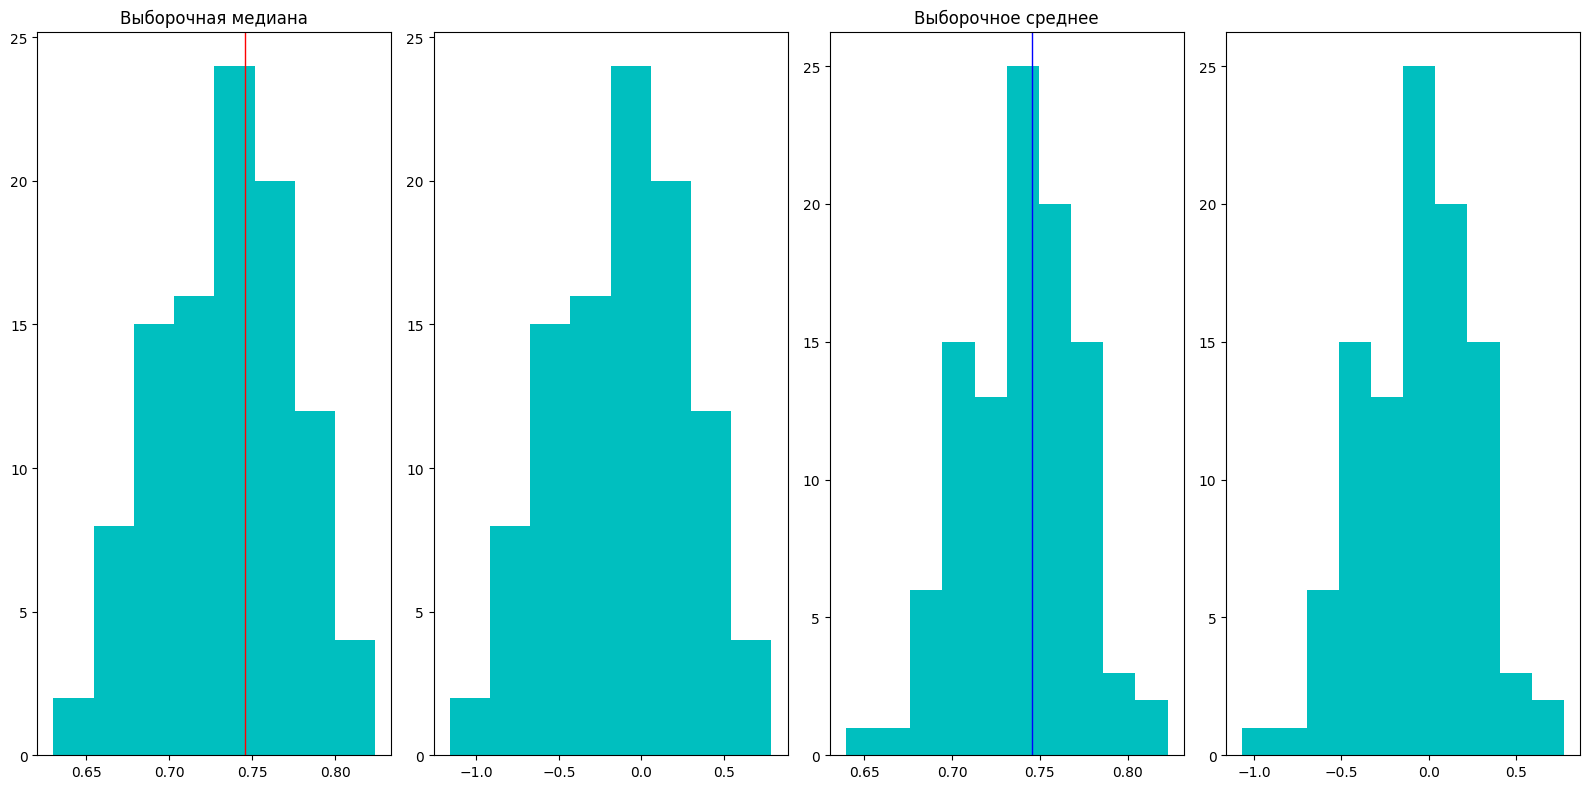

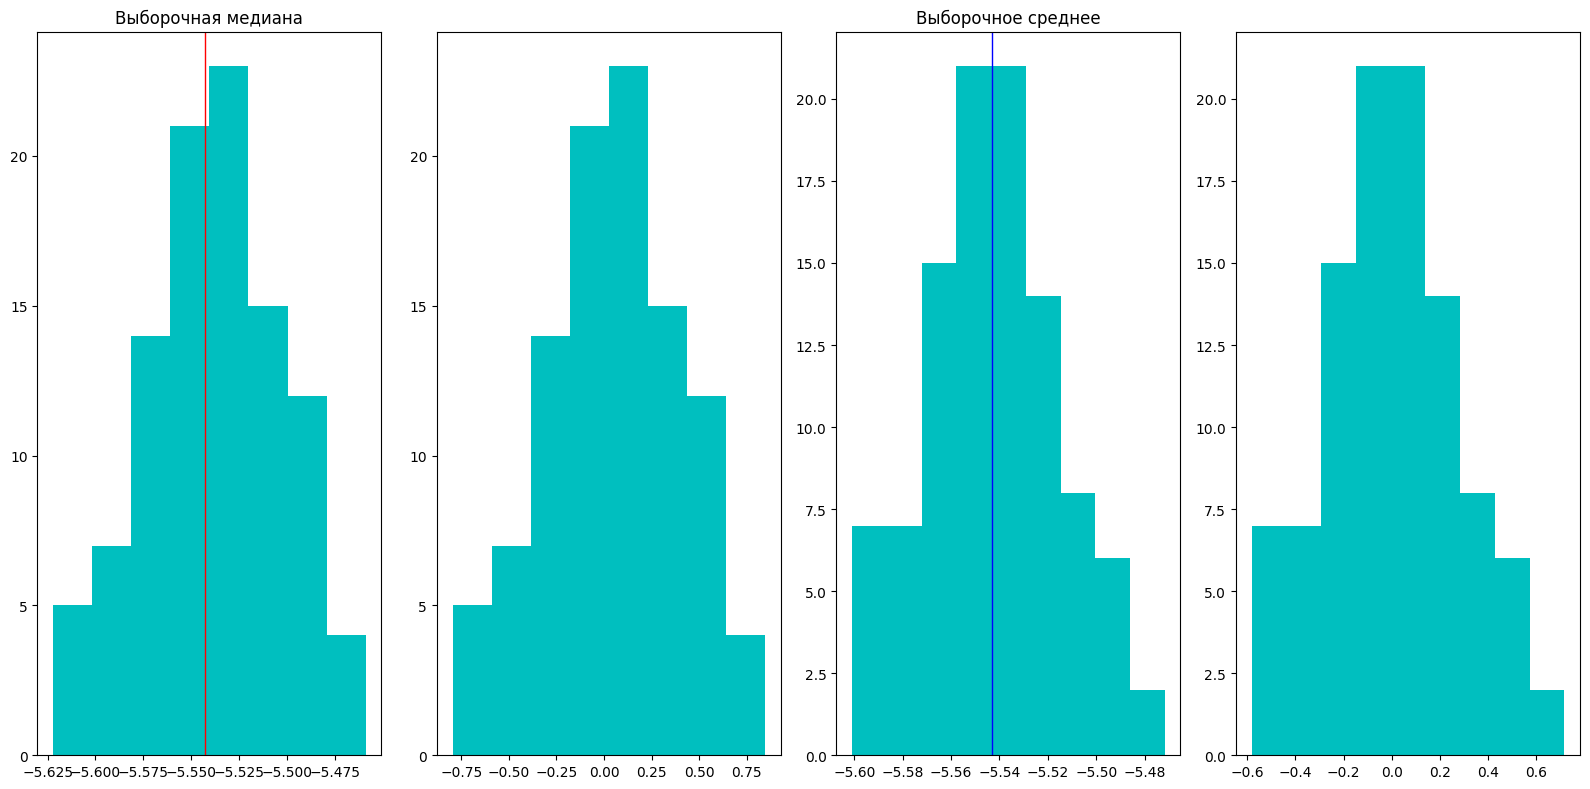

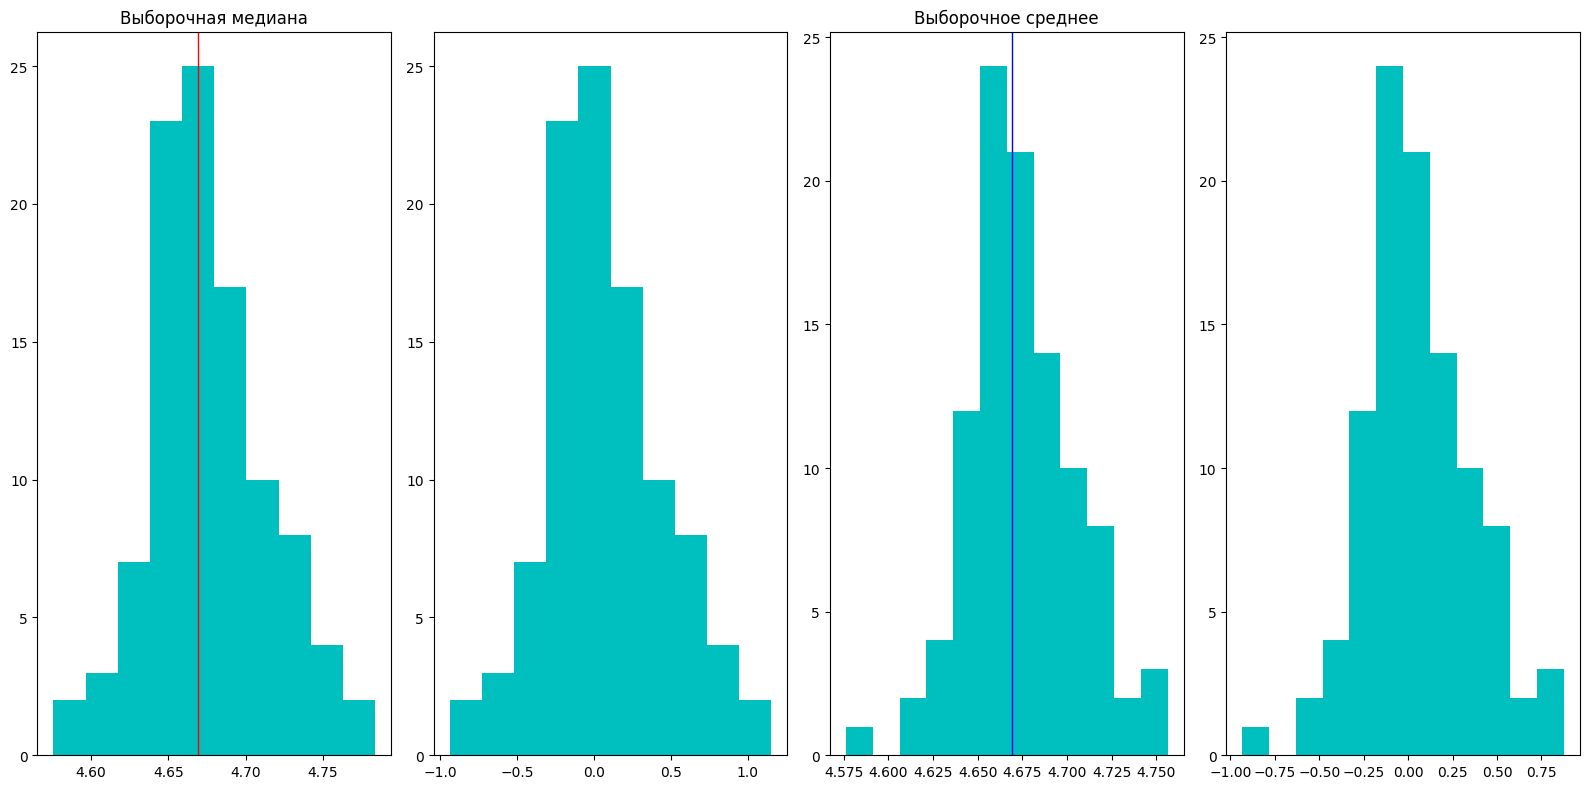

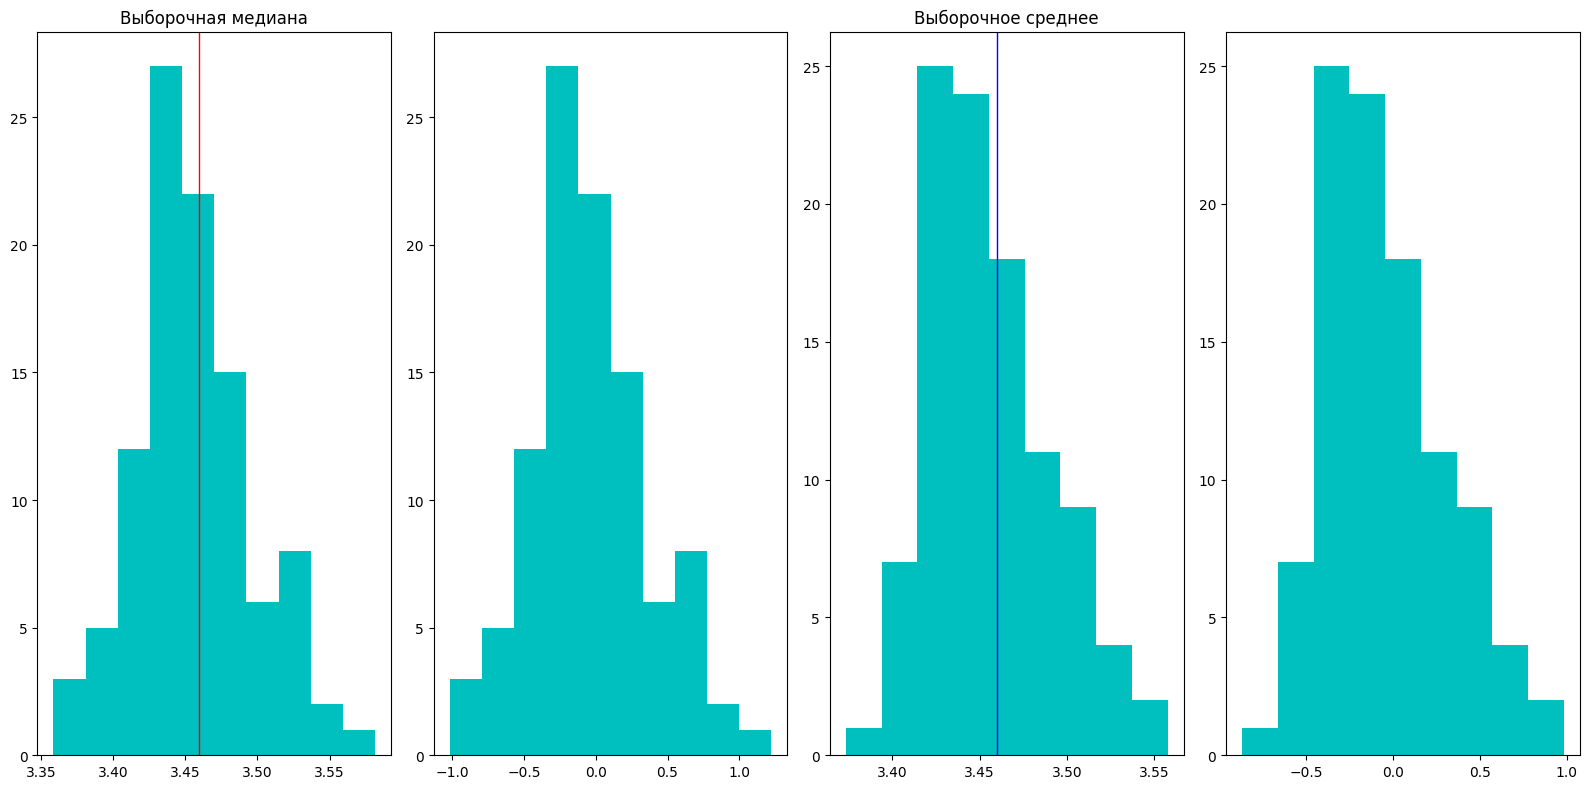

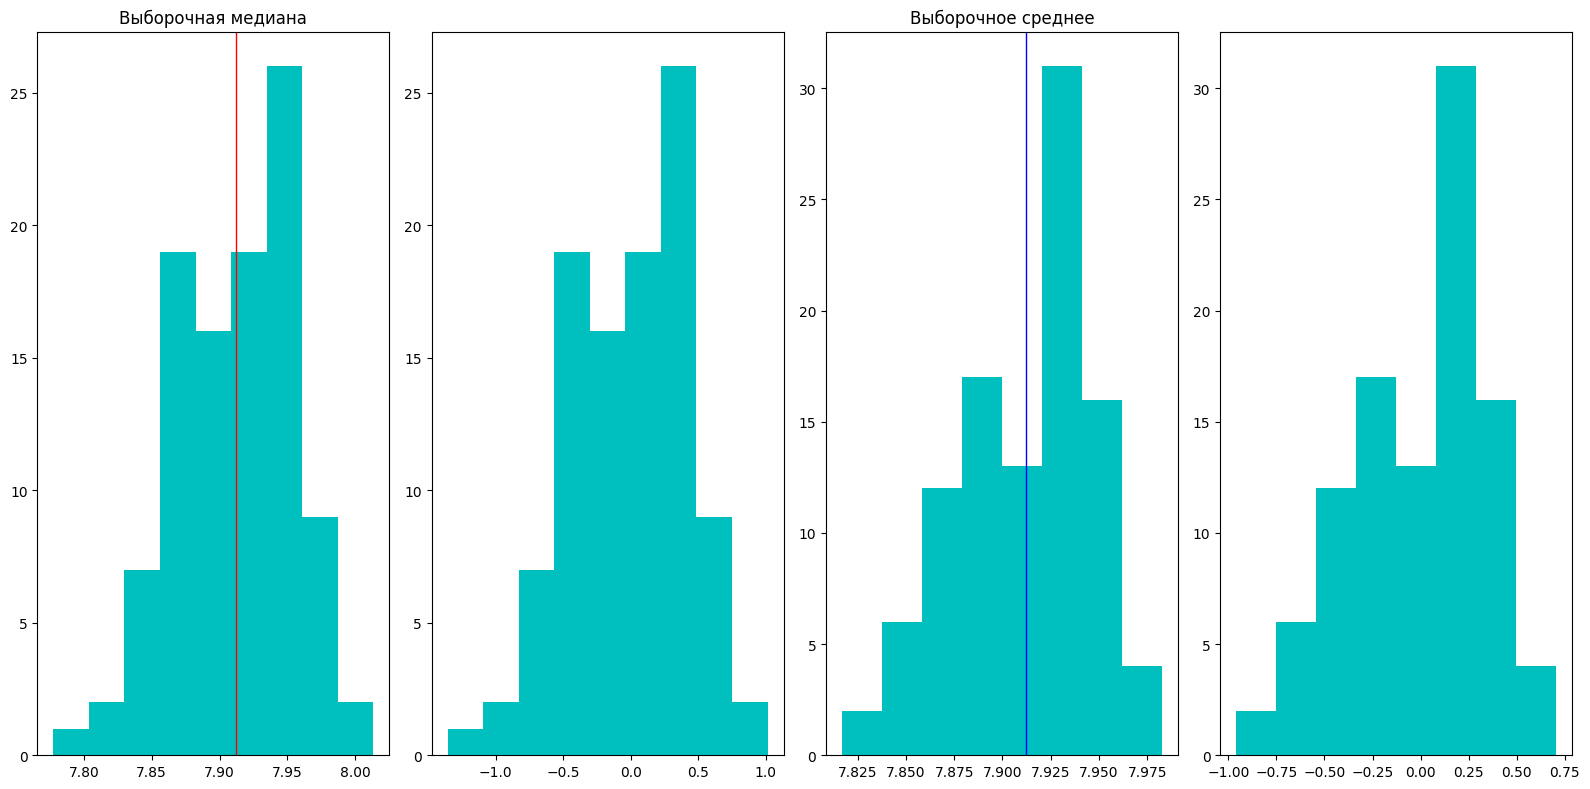

In [9]:
est_samples = comparing_estimations(dist=stats.norm, params=(True, False), scope=(-10, 10), est=std_stats)

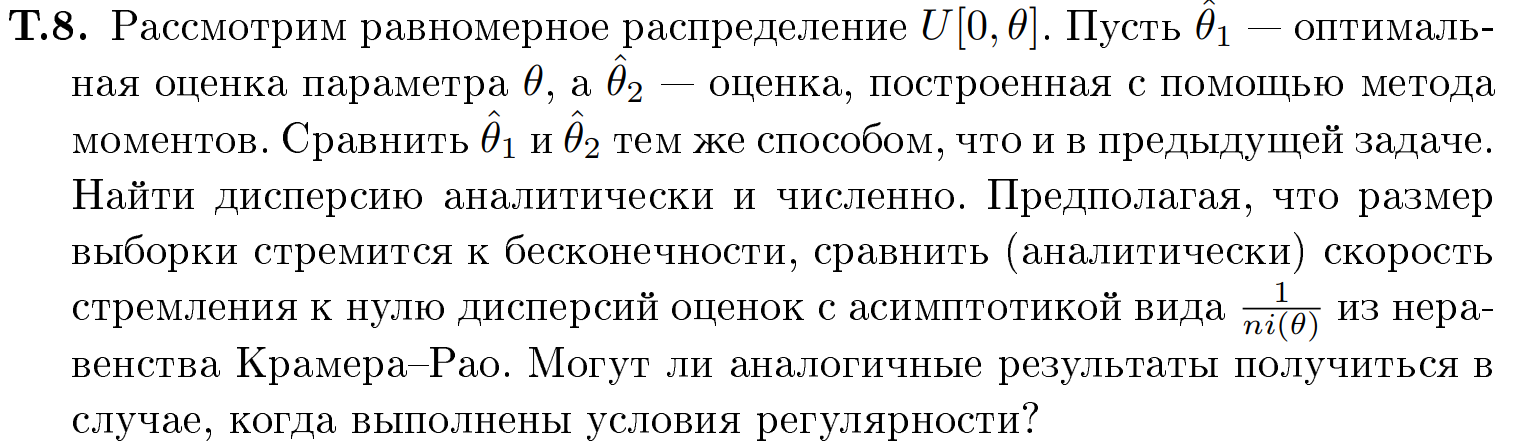

# Теоретическое дополнение

## Теормин

### Условия регулярности:

1.   $A = \{ x: f(x, \theta) \neq 0 \}$, $А$ не зависит от $\theta$
2.   $f(x, \theta)$ дифференцируема по $\theta$ на $A$
3.   $U = \frac{\partial ln(x, \theta)}{\partial \theta}$

### Неравенство Рао-Крамера

Выполнены условия регулярности, а $\hat{\theta}(X)$ - несмещенная оценка $\tau(\theta)$ с равномерно ограниченным вторым моментом, то $\forall \theta \in \Theta$:

$\:\:\:\:\:\:\mathbb{D}_{\theta} \hat{\theta}(X) \geq \frac{(\tau^{'}(\theta))^2}{ni(\theta)}$

### Критерий факторизации Неймана-Фишера

$S(X)$ - достаточная $\iff \exists$ представление $p_{\theta}$ в виде:

$\:\:\:\:\:\: p_{\theta}(X) = h(X) \psi_{\theta}(S(X))$, где $h$ и $\psi$ - неотрицательные измеримые функции.

## Нахождение оценок

### Оптимальная оценка $\hat{\theta_1}$:

Плотность выборки:

$p_{\theta}(X) = \prod_{k = 1}^{n} p_{\theta}(X_k) = \prod_{k = 1}^{n} \frac{1}{\theta} I\{ 0 \leq X_{(1)} \leq  X_{(n)} \leq \theta \}$.

Возьмём $h(X) = I\{ 0 \leq X_{(1)} \leq  X_{(n)} \}$ и $\psi_{\theta}(S(X)) = \frac{I\{X_{(n)} \leq \theta \}}{\theta^n}$, тогда $X_{(n)}$ — достаточная статистика.

<!-- Функция правдоподобия: $\frac{1}{\theta^{n}} \mathit{I}\{ X_{(n)}\leq \theta \} \overset{крит. факторизации}{\implies} X_{(n)}$ — достаточная статистика. -->

Проверим на полноту:

$\mathop{\mathbb{E_{\theta}}}(f(X_{(n)})) = \int_{0}^{\theta} f(x) n {\frac {x^{n - 1}}{\theta^{n}}} dx = 0 \iff \int_{0}^{\theta} f(x)x^{n - 1} dx = 0$

Продиффиренцируем по $\theta$:

$f(x)x^{n - 1} dx = 0 \iff f(\theta) \overset{п.н.}{=} 0 \:\:\: \forall \theta \in \Theta \implies f(X_{(n)}) \overset{п.н.}{=} 0 \:\:\: \forall \theta \in \Theta$ и $X_{(n)}$ - полная достаточная статистика.

<!-- (*) = 0 $ \forall \theta > 0 \Leftrightarrow f(x)x^{n - 1} \overset{почти \: всюду}{=} 0 \iff f(x) = 0 \; ( \mathbb{P_{\theta}} - п.н.) \; \forall \theta \in \Theta$ -->

Осталось решить уравнение несмещенности:
$\mathop{\mathbb{E_{\theta}}} \varphi(X_{(n)}) = \theta$

$\mathop{\mathbb{E_{\theta}}} X_{(n)} = \frac{n}{n + 1}\theta \implies \varphi(x) = \frac{n + 1}{n}x \implies \frac{n + 1}{n}X_{(n)}$ - оптимальная оценка.

### Оценка по методу моментов $\hat{\theta_2}$:

Так как у нас один параметр, то рассмотрим момент первого порядка, то есть

$\mathop{\mathbb{E}}(X) = \int_{0}^{\theta}x{\frac {dx}{\theta - 0}} = {\frac {\theta^{2}-0^{2}}{2(\theta - 0)}} = {\frac {\theta + 0}{2}}$, откуда

$\hat{\theta_2} = 2\overline{X}$

## Сравнение оценок

### Состоятельность

Тк $\mathop{\mathbb{E}} \frac{n + 1}{n}X_{(n)} = \frac{n + 1}{n} \mathop{\mathbb{E}} X_{(n)} = \frac{n + 1}{n} * \frac{n}{n + 1}\theta = \theta$

а дисперсия (выведено дальше): $\mathop{\mathbb{D}} \frac{n + 1}{n}X_{(n)} = \frac{\theta^2}{(n + 1)(n + 2)}$, то оценка состоятельная.

По З.Б.Ч. $2\overline{X} \overset{\mathbb{P_{\theta}}}{\longrightarrow} \theta \implies$ оценка состоятельная.

### Асимптотическая нормальность

$\mathbb{P} \left( \sqrt{n}(\frac{n + 1}{n} X_{(n)} - \theta) \leq x \right) = \mathbb{P} \left( X_{(n)} \leq \frac{n}{n + 1}(\frac{x}{\sqrt{n}} + \theta) \right) =
\begin{equation*}
  \left\{
    \begin{aligned}
      & 1, \frac{n}{n + 1}(\frac{x}{\sqrt{n}} + \theta) > \theta \\
      & \left(\frac{ \frac{n}{n + 1} (\frac{x}{\sqrt{n}} + \theta) }{\theta} \right)^n, \frac{n}{n + 1} (\frac{x}{\sqrt{n}} + \theta) \in [0; \theta] \\
      & 0, \frac{n}{n + 1}(\frac{x}{\sqrt{n}} + \theta) < 0
    \end{aligned}
  \right.
\end{equation*}
\overset{n \rightarrow \infty}{\longrightarrow}$
$
\begin{equation*}
  \left\{
    \begin{aligned}
      & 1, x \geq 0 \\
      & 0, x < 0
    \end{aligned}
  \right.
\end{equation*}
$

Таким образом оптимальная оценка не асимптотически нормальная.

ЦПТ:

$\sqrt{n}(2 \overline{X} - \theta) \longrightarrow \mathcal{N}(0, \frac{\theta^2}{3})$

Следовательно ОММ - асимптотически нормальная.

### Дисперсии

$\mathop{\mathbb{E}} X_{(n)}^2 = \int_{0}^{\theta} nx^2 \frac{x^{n - 1}}{\theta^n}dx = \theta^2 \frac{n}{n + 2} \implies \mathop{\mathbb{D}} X_{(n)} = \theta^2n \left( \frac{1}{n + 2} - \frac{n}{(n + 1)^2}\right) = \theta^2 \frac{n}{(n + 1)^2(n + 2)} \implies \mathop{\mathbb{D}} \frac{n + 1}{n}X_{(n)} = \frac{\theta^2}{(n + 1)(n + 2)}$

$\mathop{\mathbb{D}} (2 \overline{X}) = \frac{4}{n} \mathop{\mathbb{D}} X_1 =  \frac{\theta^2}{3n}$

## Выводы

*   Скорость сходимости у оптимальной оценки выше, а у ОММ совпадает с $\frac{1}{ni(\theta)}$.

*   Если бы выполнялись условия регулярности, то скорости сходимости совпадали бы.(По неравенству РАО-Крамера)

In [10]:
def optimal_est(sample: list[float]):
  n = len(sample)
  coef = (n + 1) / n

  return coef * np.max(sample)


def momentum_est(sample: list[float]):
  return 2 * np.mean(sample)

In [11]:
opt_est = ParametricEstimation(optimal_est, name='Оптимальная оценка')
moment_est = ParametricEstimation(momentum_est, name='Оценка методом моментов')

T8_est = (opt_est, moment_est)

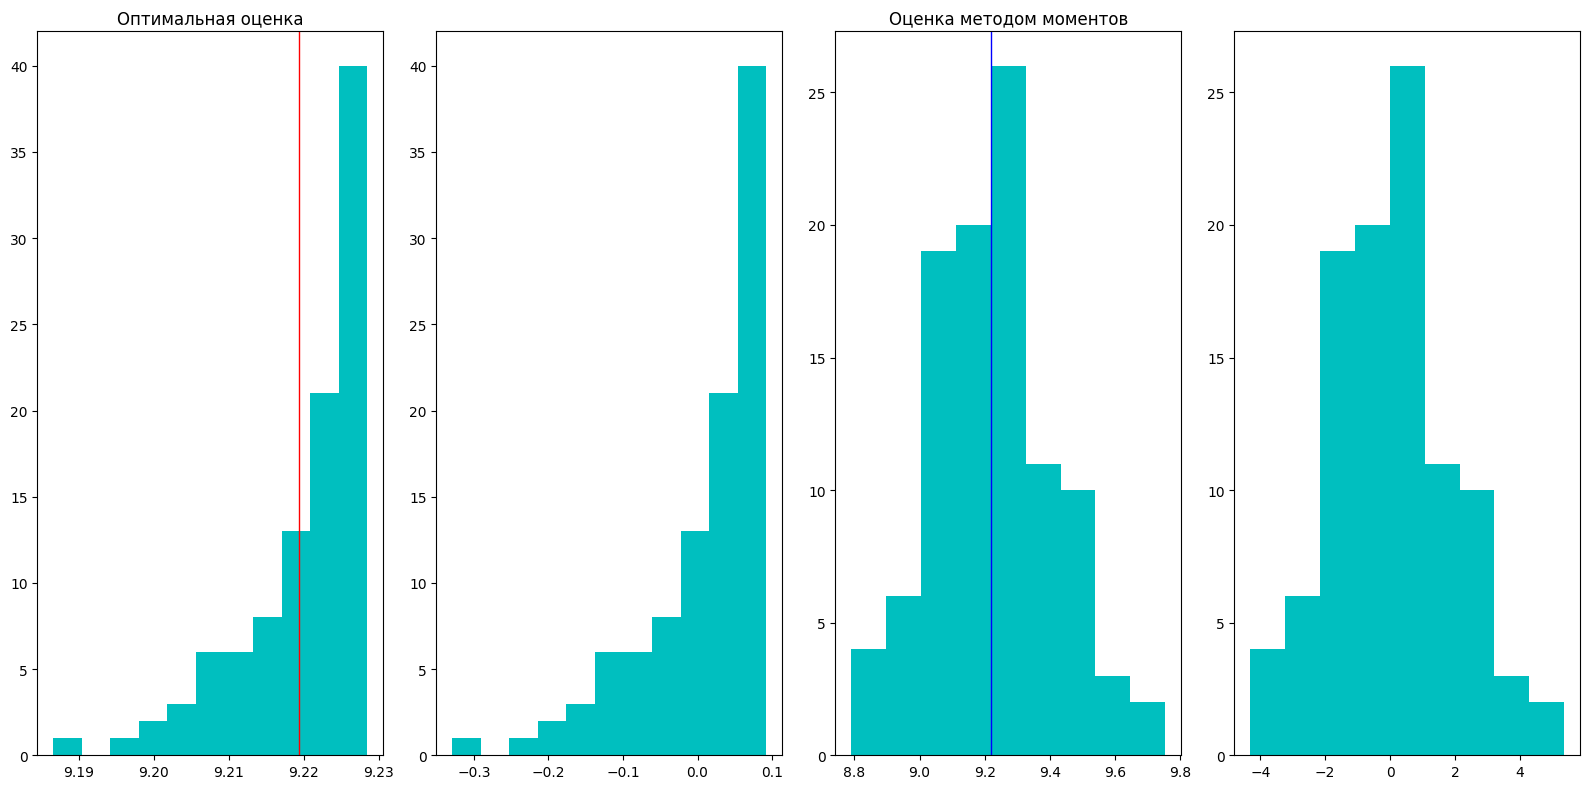

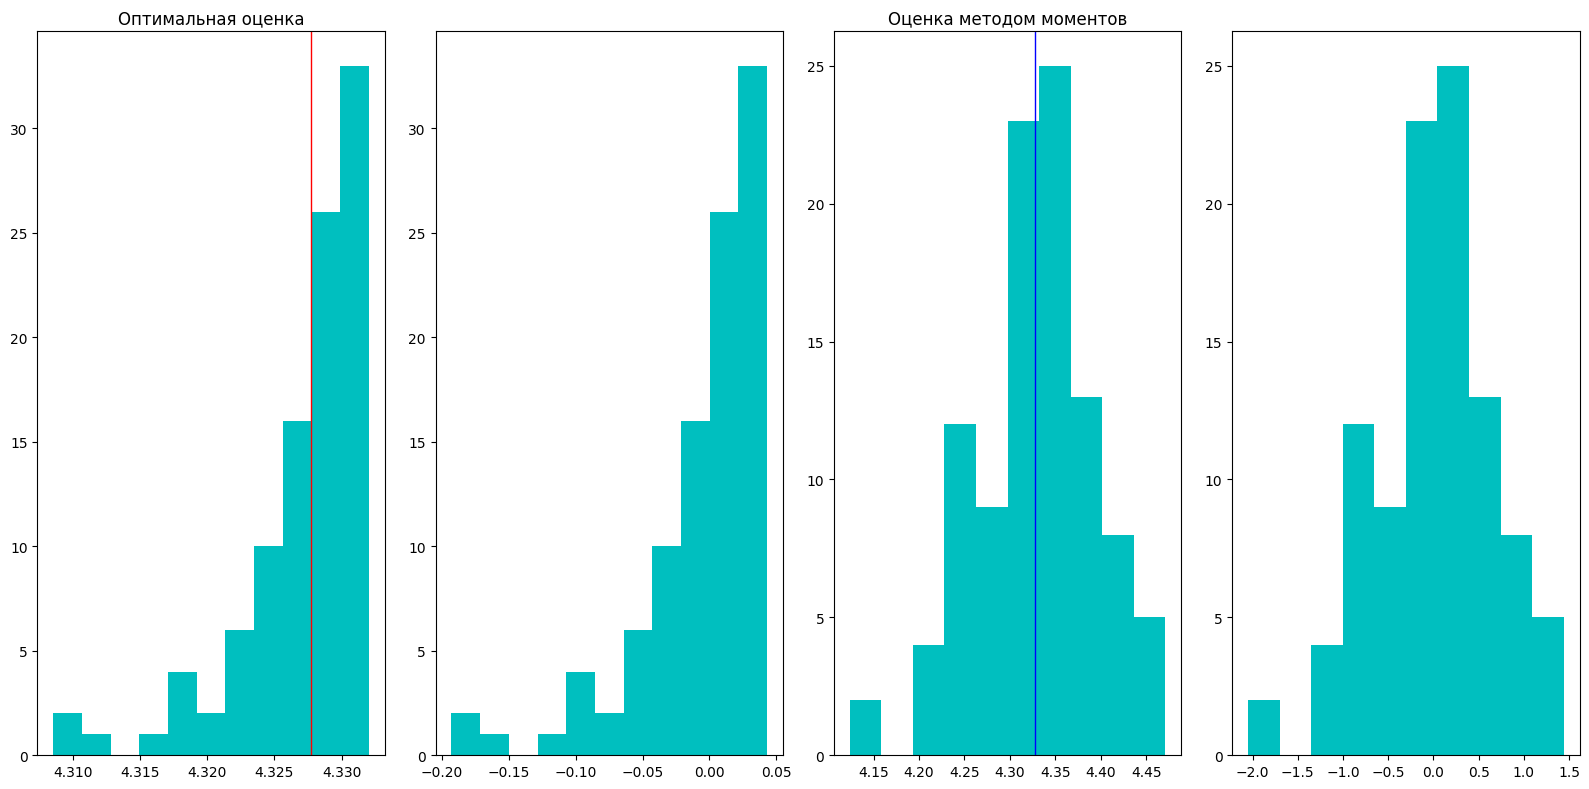

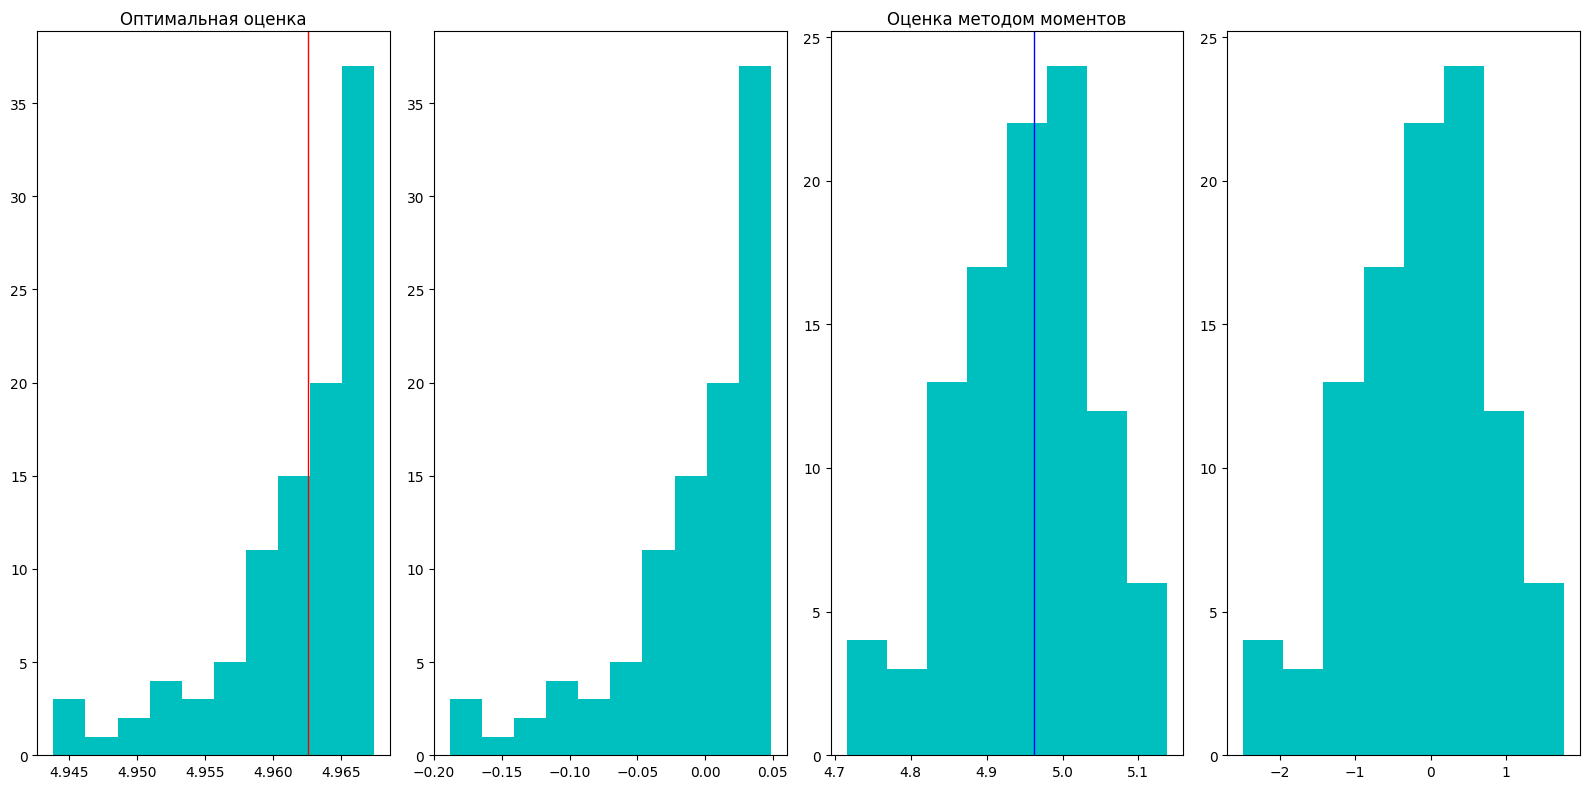

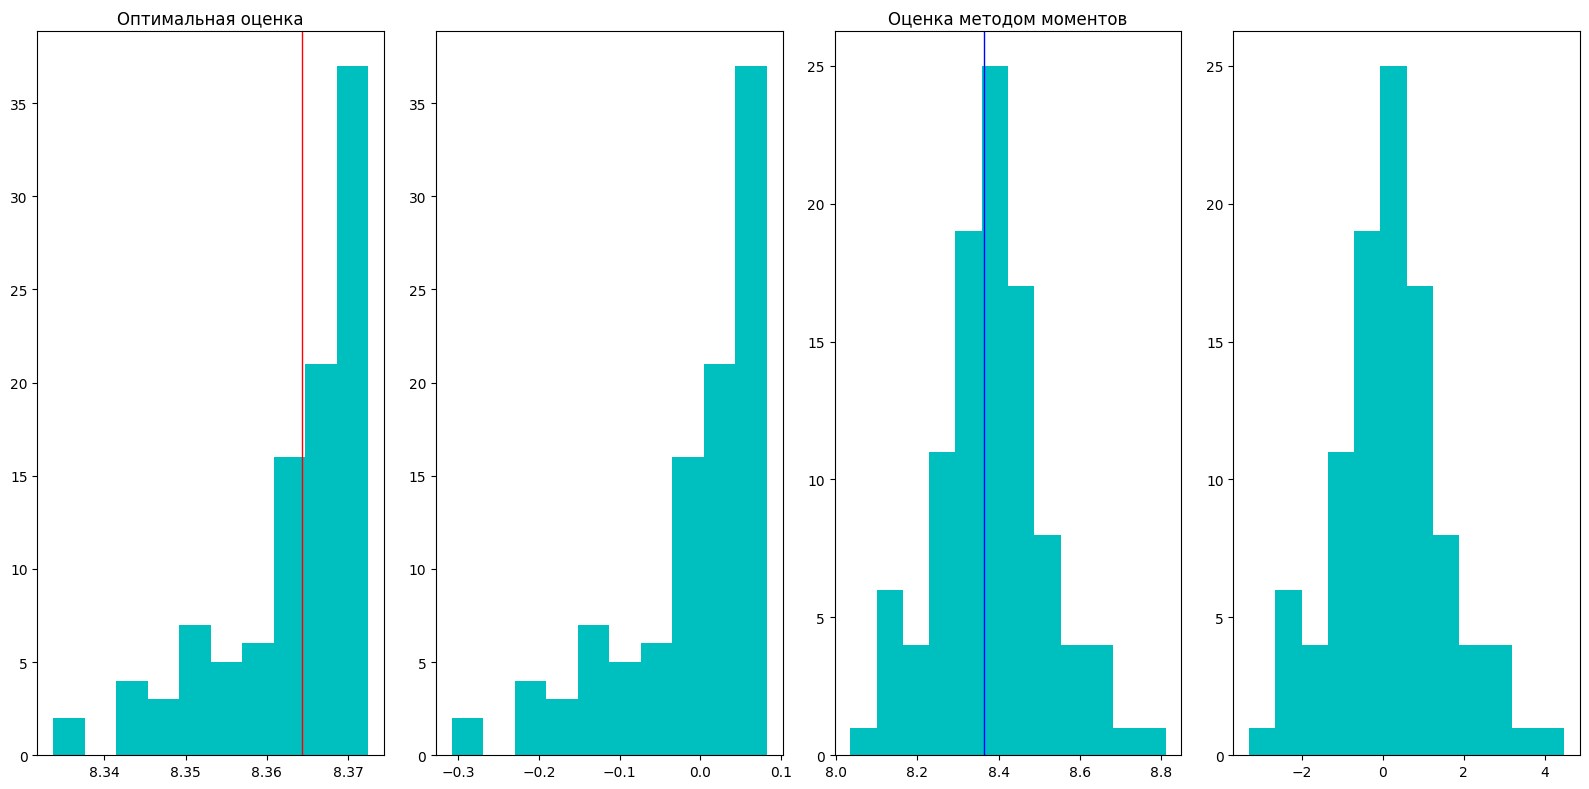

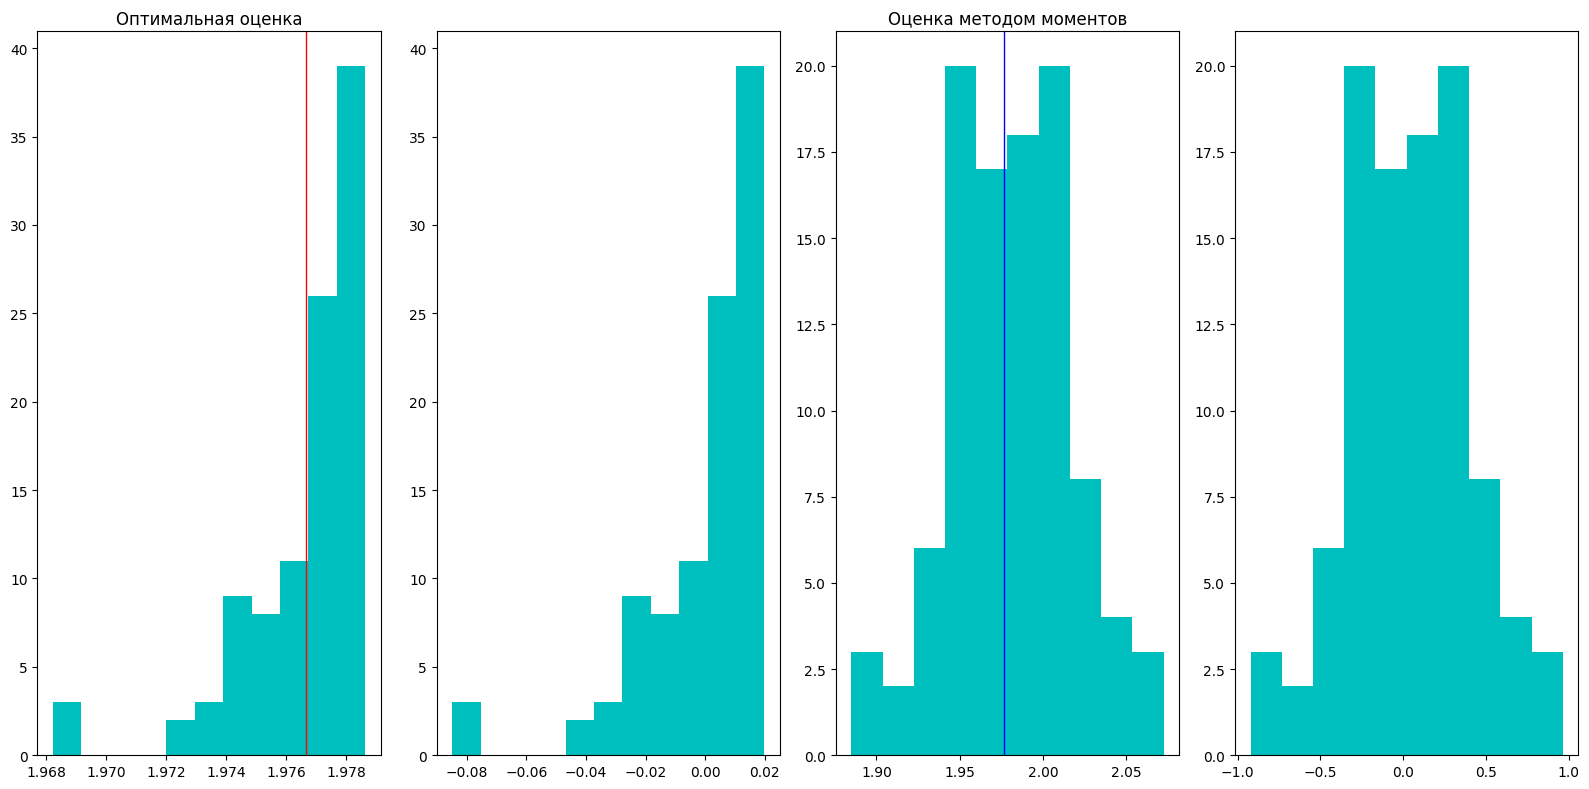

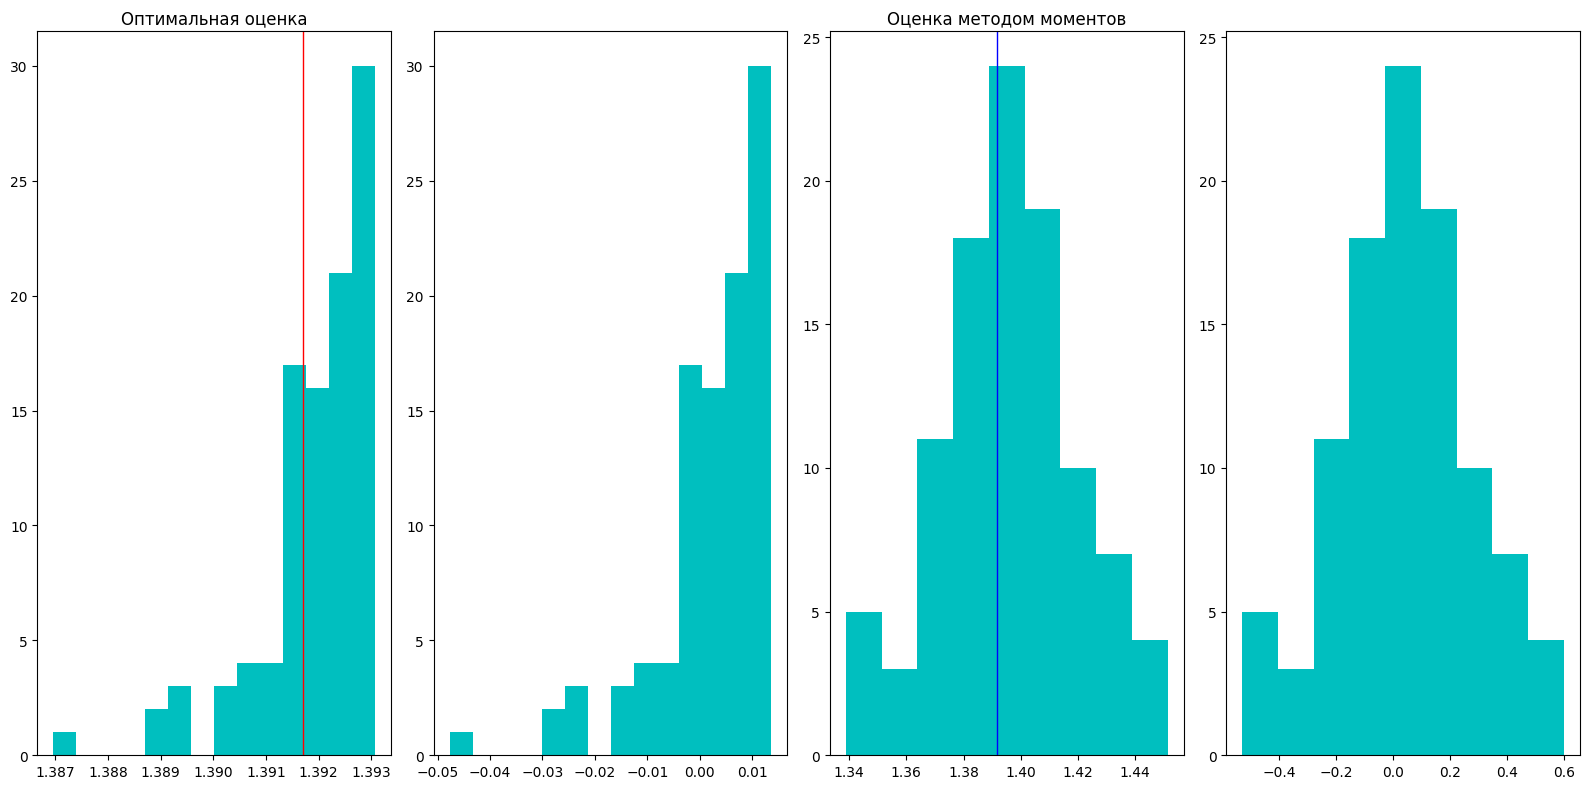

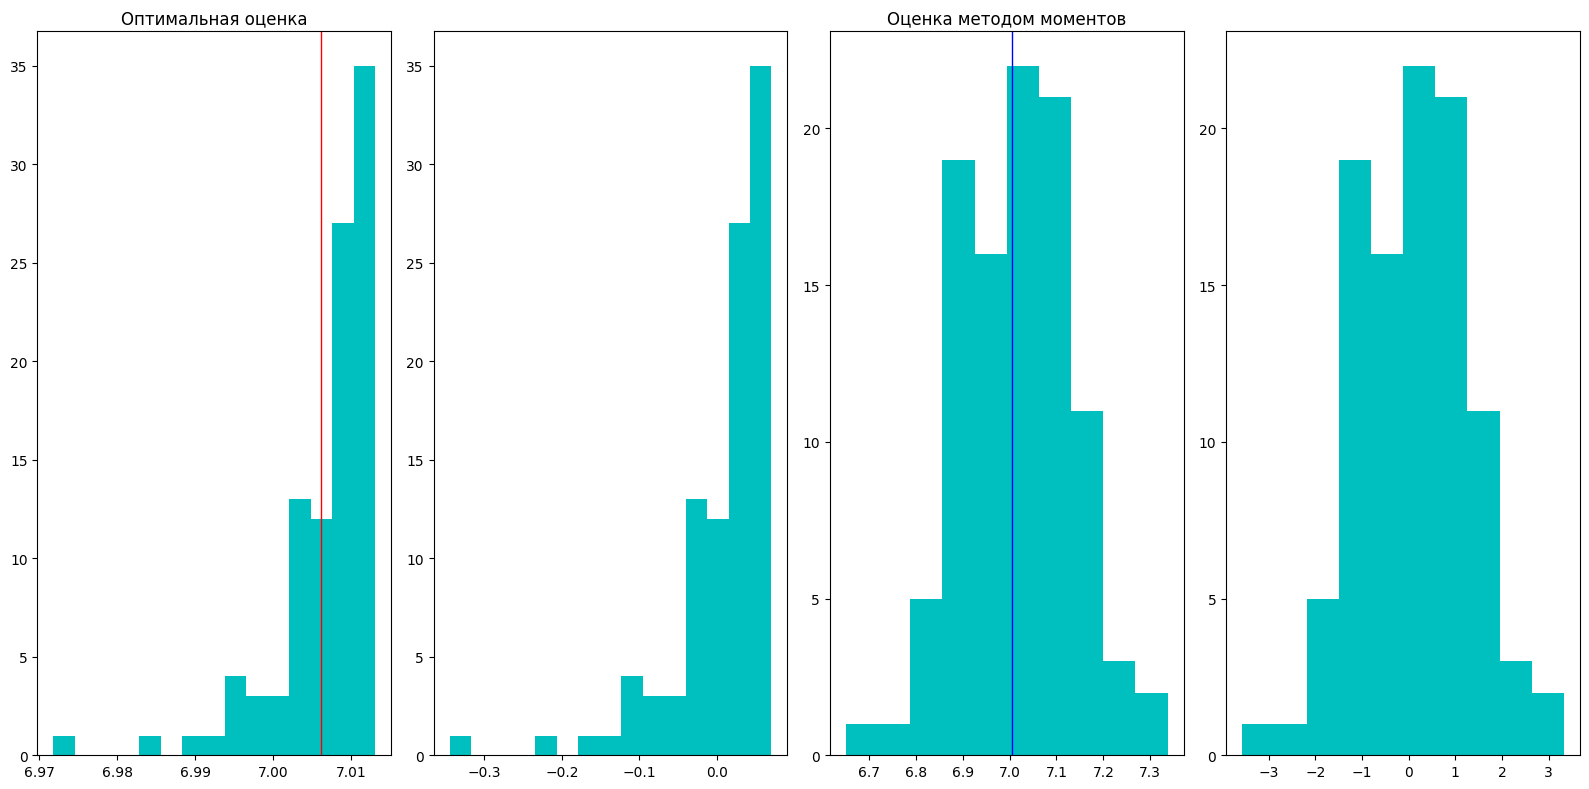

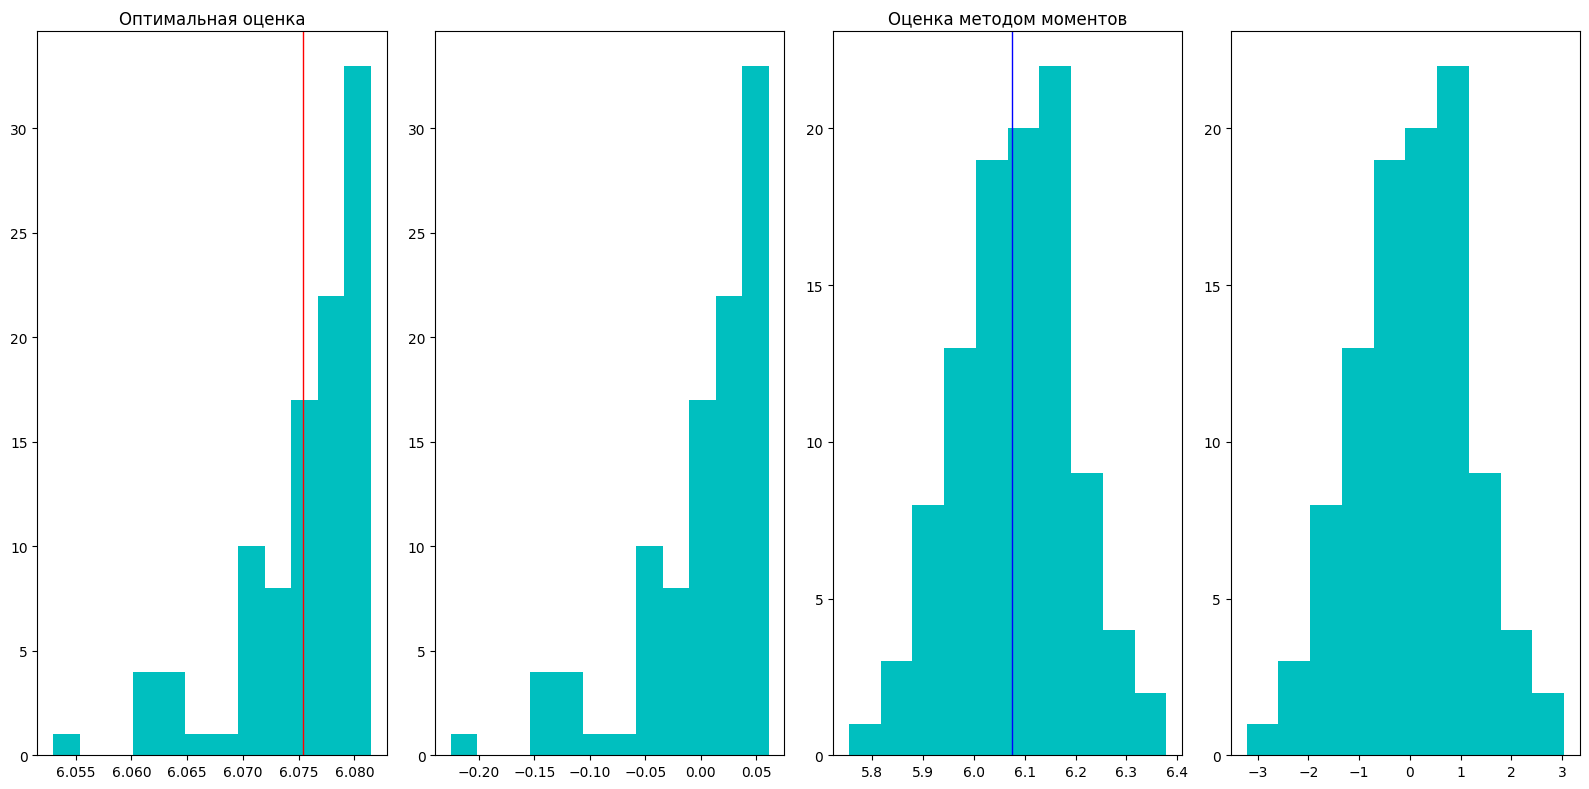

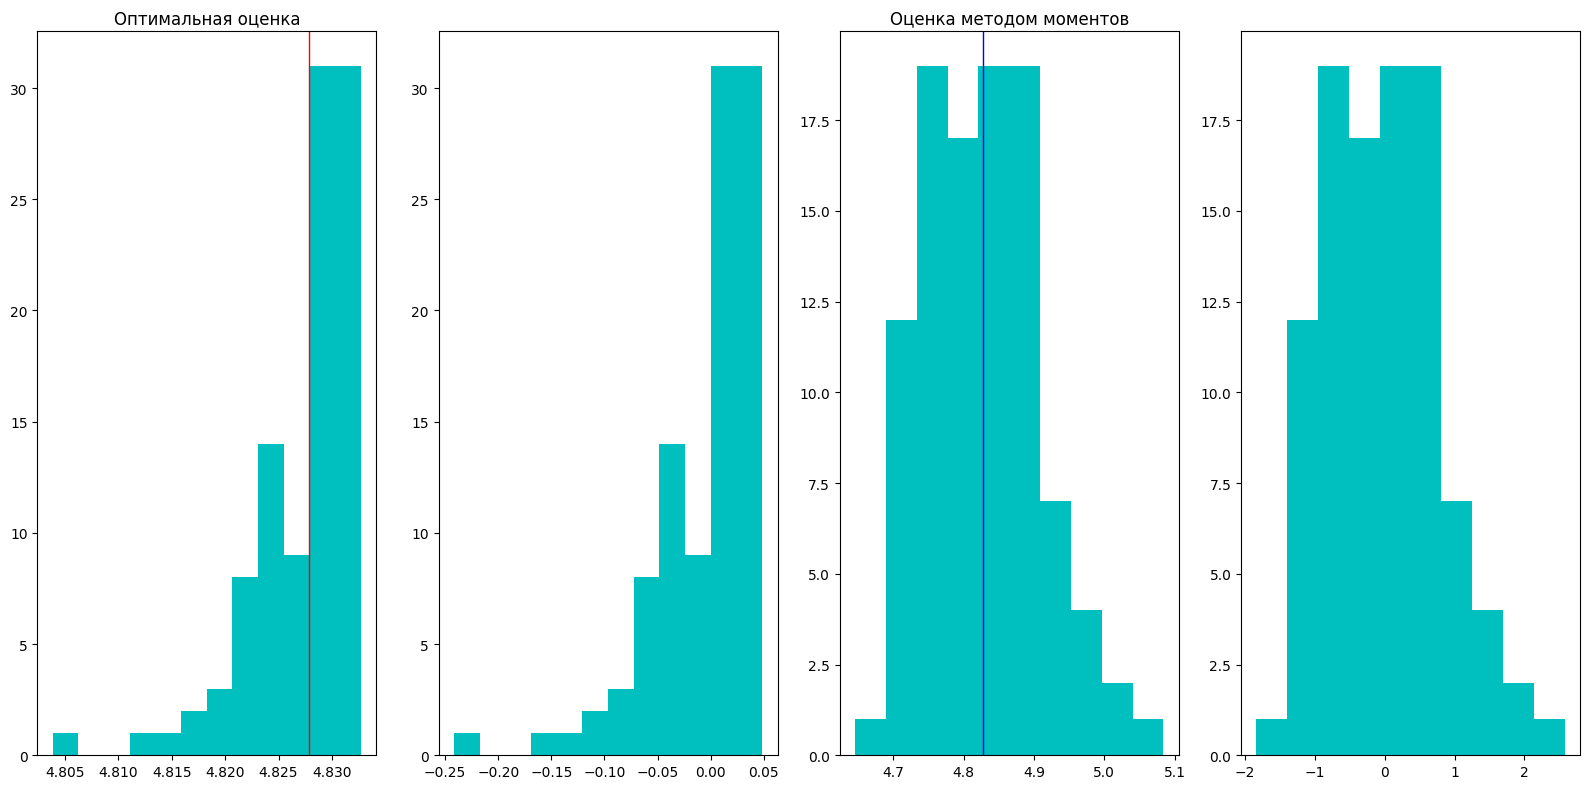

In [12]:
est_samples = comparing_estimations(dist=stats.uniform, params=(False, True), scope=(0, 10), est=T8_est)

In [13]:
for theta, theta1_dist, theta2_dist in est_samples:
  print(f'Выборочная дисперсия theta_1: {np.var(theta1_dist):.5f}, аналитическая дисперсия theta_1: {(theta**2 / ((len(theta1_dist) + 1) * (len(theta1_dist) + 2))):.5f}')
  print(f'Выборочная дисперсия theta_2: {np.var(theta2_dist):.5f}, аналитическая дисперсия theta_2: {(theta**2 / (3 * len(theta1_dist))):.5f}\n')

Выборочная дисперсия theta_1: 0.00007, аналитическая дисперсия theta_1: 0.00809
Выборочная дисперсия theta_2: 0.03461, аналитическая дисперсия theta_2: 0.28051

Выборочная дисперсия theta_1: 0.00002, аналитическая дисперсия theta_1: 0.00178
Выборочная дисперсия theta_2: 0.00449, аналитическая дисперсия theta_2: 0.06181

Выборочная дисперсия theta_1: 0.00003, аналитическая дисперсия theta_1: 0.00234
Выборочная дисперсия theta_2: 0.00826, аналитическая дисперсия theta_2: 0.08128

Выборочная дисперсия theta_1: 0.00007, аналитическая дисперсия theta_1: 0.00666
Выборочная дисперсия theta_2: 0.01785, аналитическая дисперсия theta_2: 0.23090

Выборочная дисперсия theta_1: 0.00000, аналитическая дисперсия theta_1: 0.00037
Выборочная дисперсия theta_2: 0.00132, аналитическая дисперсия theta_2: 0.01290

Выборочная дисперсия theta_1: 0.00000, аналитическая дисперсия theta_1: 0.00018
Выборочная дисперсия theta_2: 0.00058, аналитическая дисперсия theta_2: 0.00639

Выборочная дисперсия theta_1: 0.00

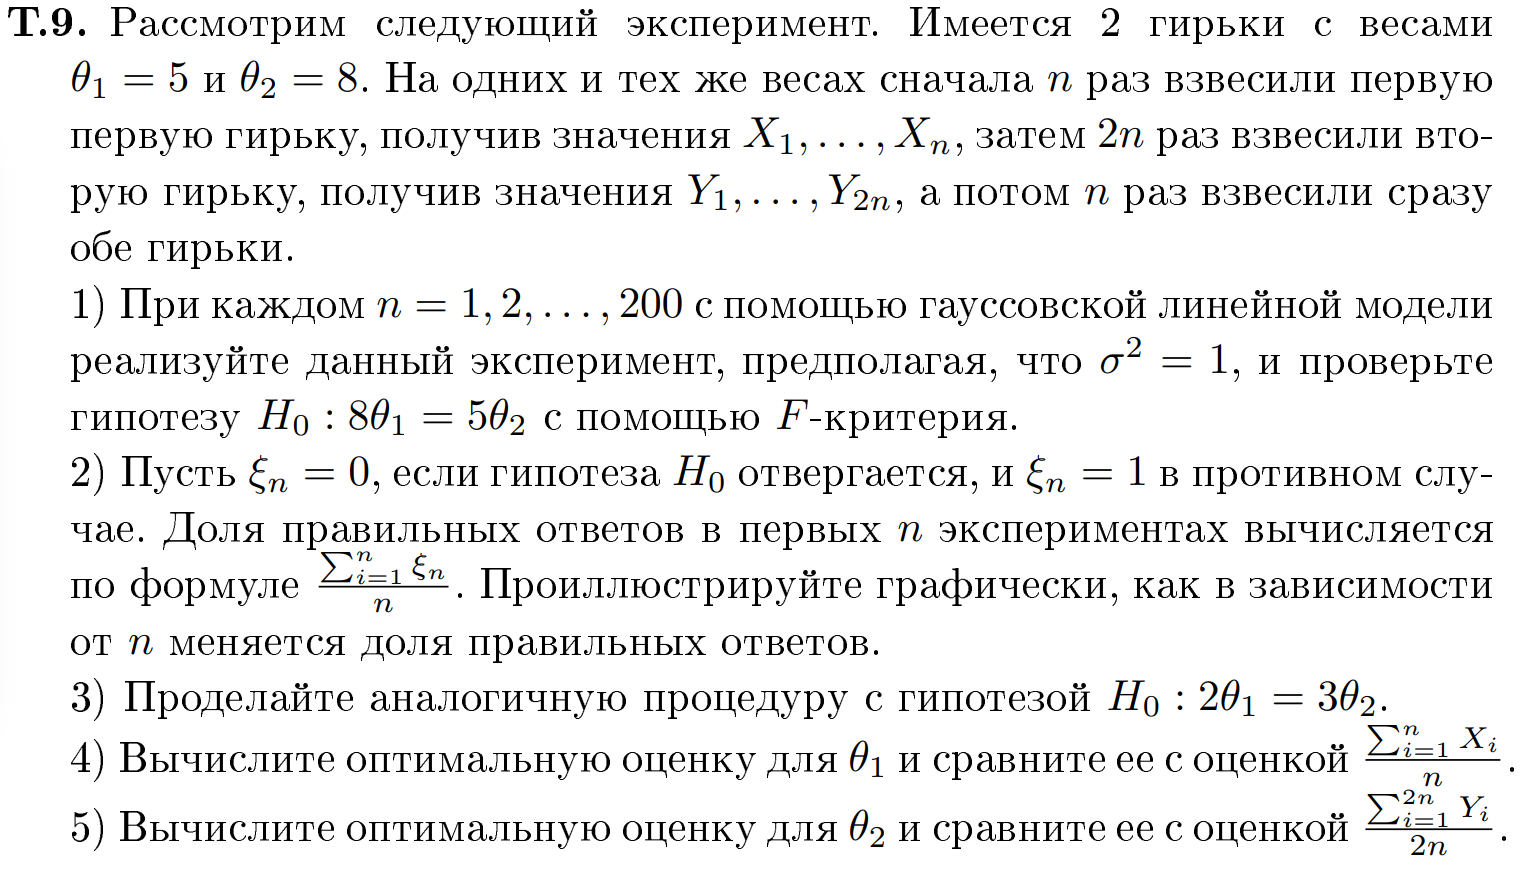

# Теоретическое дополнение

## Гауссова линейная модель:

$X = Z \theta + \varepsilon$, где $\varepsilon ~ \mathcal{N}(0, \sigma^2(I_n))$

## F-критерий

Пусть линейная гипотеза имеет вид:

$\:\:\: H_0: T\theta = \tau$

Положим

$\:\:\: B = T(Z^{T}Z)^{-1}T^T, \:\:\: \hat{t} = T\hat{\theta}$

Пусть $u_{1-\alpha}$ - квантиль $(1-\alpha)$ $F_{m,n-k}$.

Тогда критерий для проверки гипотезы $H_0$ (F - критерий) имеет вид:

$\:\:\: S = \{ F_T > u_{1-\alpha} \}$, где $F_T = \frac{(\hat{t} - \tau) B^{-1} (\hat{t} - \tau)}{ || X - Z\hat{\theta}|| } \frac{n - k}{m} \sim F_{m, n-k} \:$, где

$\:\:\:$ m = rank(T), \\
$\:\:\:$ n - длина вектора X, \\
$\:\:\:$ k - длина вектора $\theta$

Соответственно, если он выполняется, то отвергаем гипотезу, иначе принимаем.

## Оптимальная оценка параметра $\theta$:

$\hat{\theta} = (Z^T Z)^{-1} Z^T X$

In [14]:
def plot_results(percentage, coefs):
  fig, ax = plt.subplots(figsize=(20, 10))
  ax.set_xlabel('размер выборки')
  ax.set_ylabel('доля')
  ax.set_title(f'H_0: {coefs[0]} * theta_1 = {coefs[1]} * theta_2')

  ax.plot(percentage)
  ax.grid(True)


def count_diff(sample):
  diff = 0
  sample_mean = np.mean(sample)
  for elem in sample:
    diff += (elem - sample_mean) ** 2

  return diff


def GenerateZ(n):
  Z = [
    [1 for _ in range(n)],
    [0 for _ in range(n)]
  ]
  Z[0].extend([0 for _ in range(2 * n)])
  Z[1].extend([1 for _ in range(2 * n)])
  Z[0].extend([1 for _ in range(n)])
  Z[1].extend([1 for _ in range(n)])

  return np.array(Z)


def construct_F_criterion(thetas : tuple[int, int], coefs : tuple[int, int], n : int, samples):
  Z = GenerateZ(n).T
  theta = np.array([thetas]).T
  W = np.concatenate(samples) #Z @ theta

  T = np.array([coefs])
  TZZ = np.dot(T, np.linalg.inv((Z.T @ Z)))
  B = (TZZ @ T.T).item()

  est_T_theta = (TZZ @ Z.T @ W).item()

  norm_w_sub_ztheta = 0
  for sample in samples:
    norm_w_sub_ztheta += count_diff(sample)

  return ((est_T_theta ** 2) / (B * norm_w_sub_ztheta)) * (4 * n - 2)


def Ftest(w1, w2, coefs : tuple[int, int], alpha):
  percentage = []
  cnt = 0

  for n in range(1, 200 + 1):
    X = stats.norm.rvs(loc=w1, size=n)
    Y = stats.norm.rvs(loc=w2, size=2*n)
    XY = stats.norm.rvs(loc=w1 + w2, size=n)

    F_t = construct_F_criterion((w1, w2), coefs, n, (X, Y, XY))

    if F_t <= stats.f.ppf(1 - alpha, 1, 4 * n - 2):
      cnt += 1

    percentage.append(cnt / n)

  plot_results(percentage, coefs)

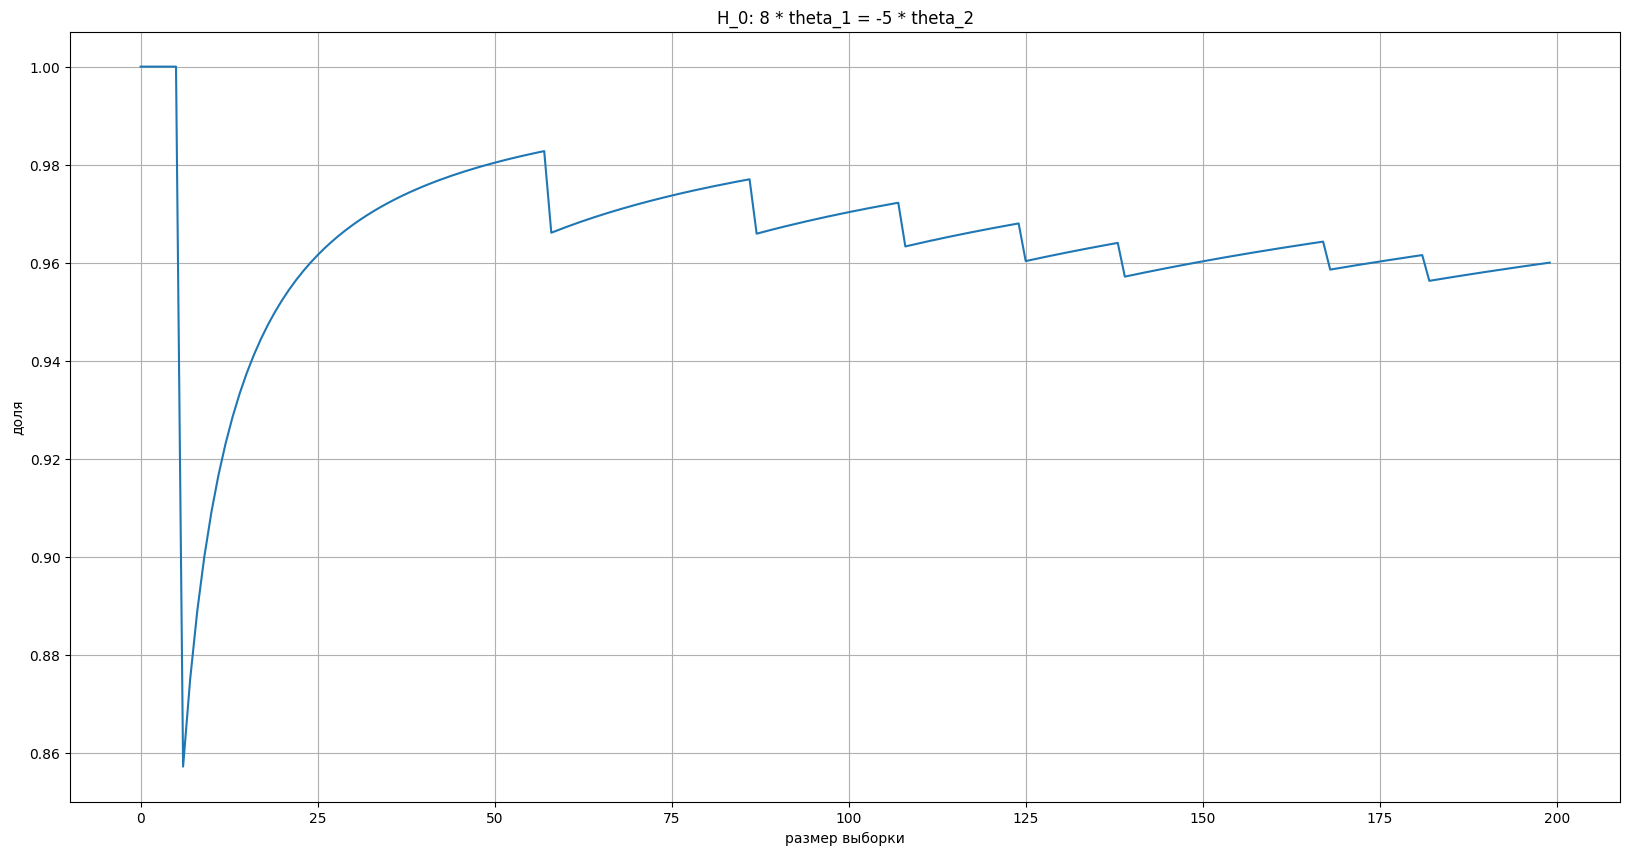

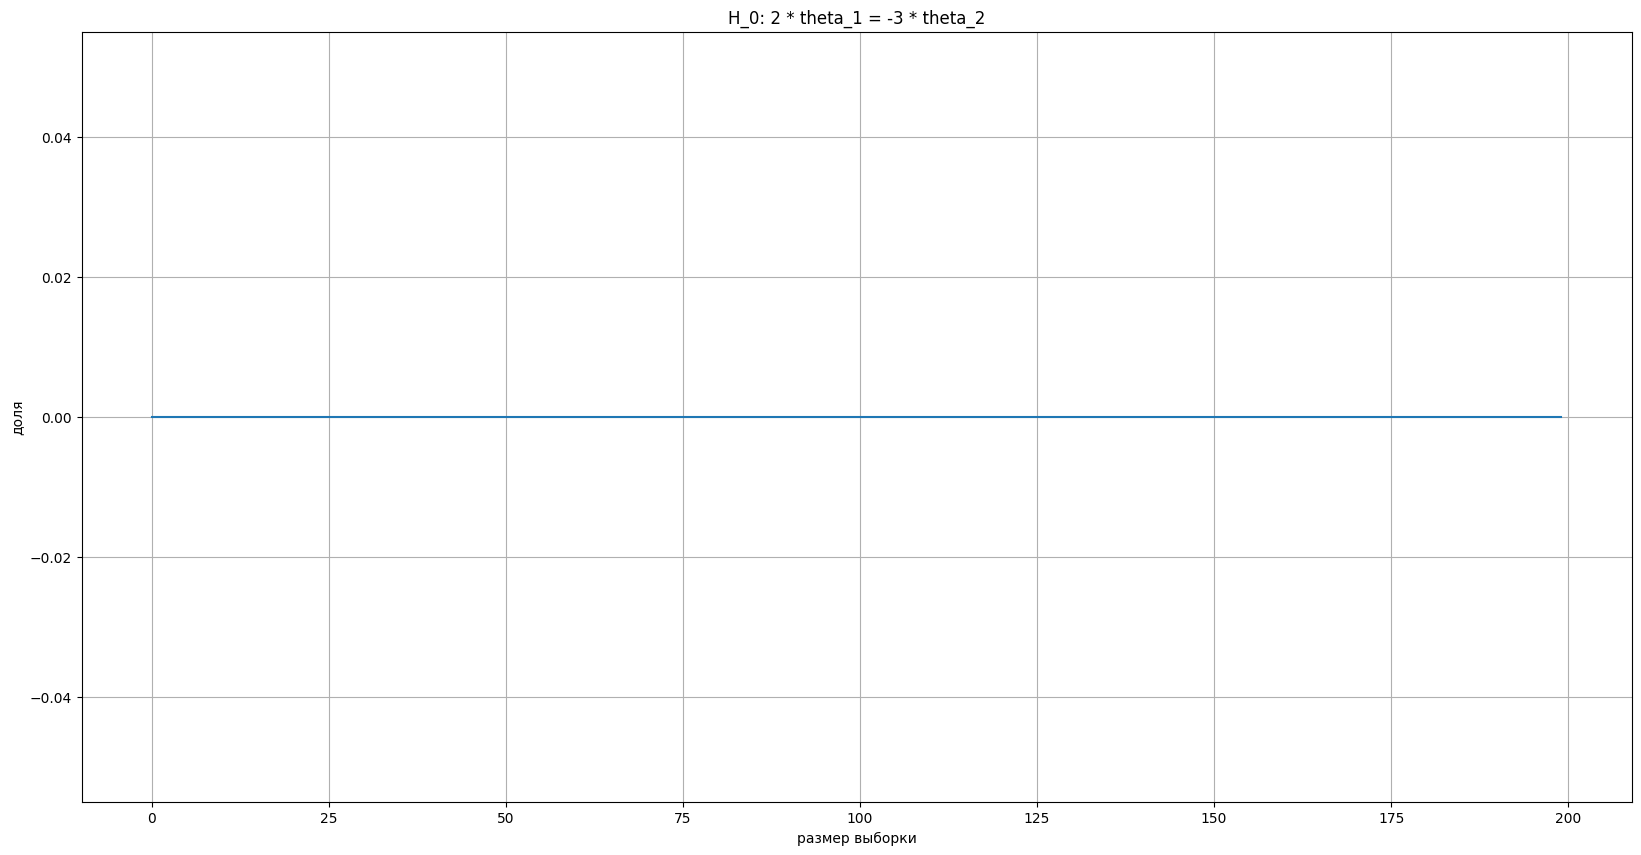

In [15]:
Ftest(5, 8, (8, -5), alpha=0.05)
Ftest(5, 8, (2, -3), alpha=0.05)

In [16]:
def plot_ests(ests, means):
  fig, ax = plt.subplots(figsize=(20, 10))
  ax.plot(ests, color='green', label='оптимальные оценки')
  ax.plot(means, color='red', label='выборочные средние')

  ax.set_title(f'Сравнение оптимальной оценки и выборочного среднего')
  ax.set_xlabel('размер выборки')
  ax.set_ylabel('оценка')
  plt.legend()

  ax.grid(True)


def get_opt_est(n, X):
  Z = GenerateZ(n).T

  return np.linalg.inv(Z.T @ Z) @ Z.T @ X


def CompareEsts(w1, w2):
  means = []
  opt_ests = []

  cnt = 0
  for n in range(1, 200 + 1):
    X = stats.norm.rvs(loc=w1, size=n)
    Y = stats.norm.rvs(loc=w2, size=2*n)
    XY = stats.norm.rvs(loc=w1 + w2, size=n)

    means.append((np.mean(X), np.mean(Y)))
    opt_ests.append(get_opt_est(n, np.concatenate((X, Y, XY))))

  plot_ests(opt_ests, means)

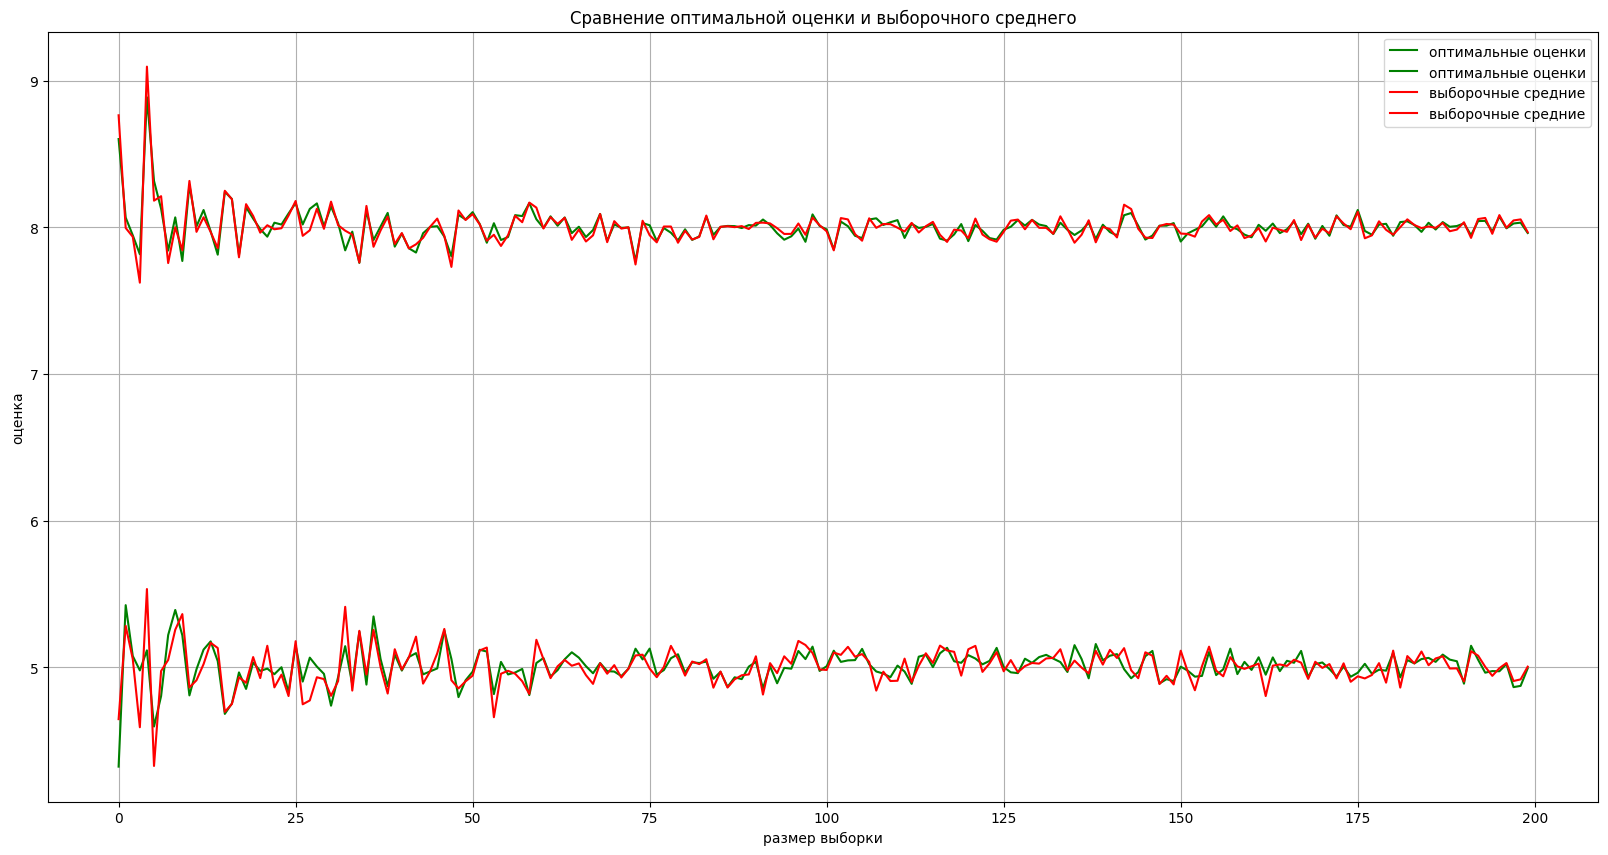

In [17]:
CompareEsts(5, 8)

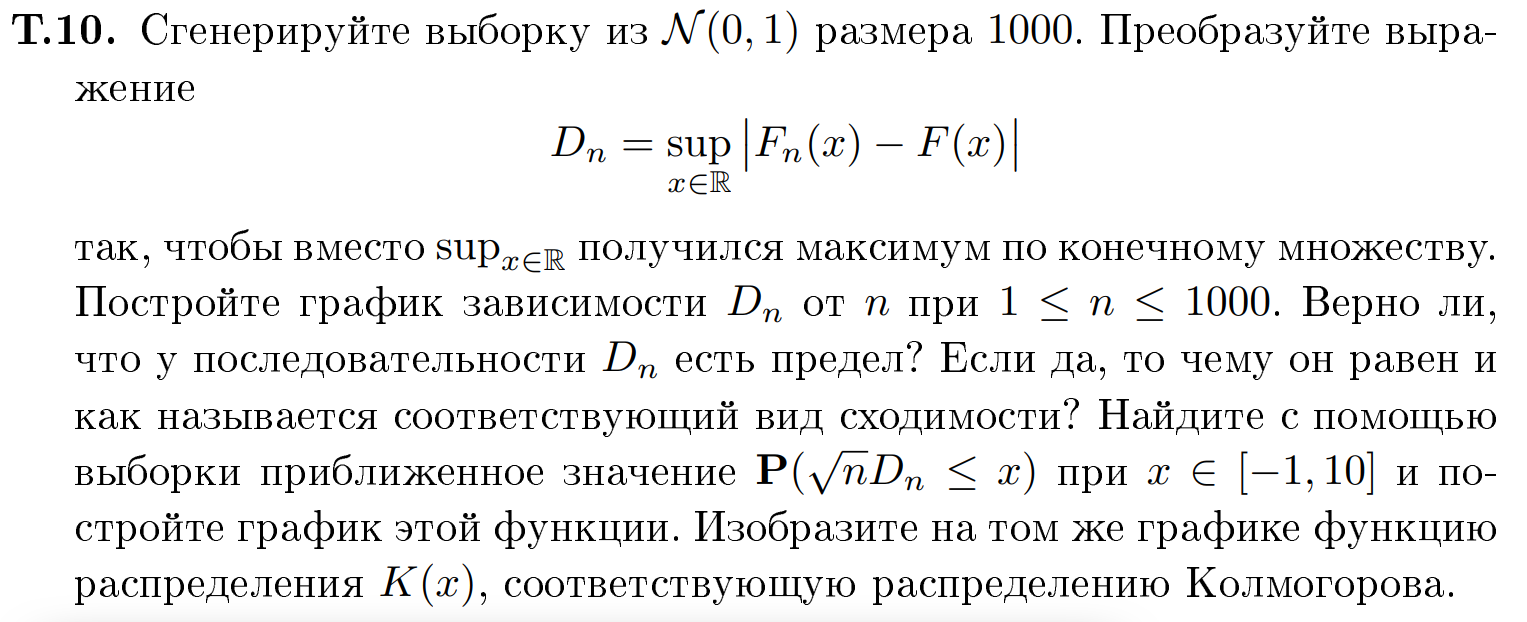

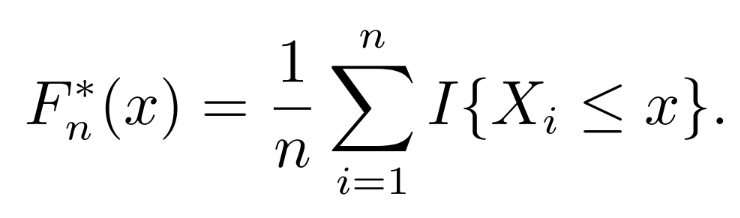

$\forall k \in \{1 ... n - 1\}$ на интервале $[X_{(k)}, X_{(k+1)})$ значение функции $F^{*}_{n} = \frac{k}{n}$

F(x) не убывает, поэтому на этом интервале $|F^{*}_{n}(x) - F(x)|$ не превосходит $max\{ \frac{k}{n} - F^{*}_{n}(X_{(k)}), F^{*}_{n}(X_{(k + 1)}) - \frac{k + 1}{n} \}$.

Кроме того, на интервале $(-\infty, X_{(1)}): F^{*}_{n} = 0 \implies |F^{*}_{n}(x) - F(x)| \leq F(X_{(1)})$

Наконец, на интервале $[X_{(k)}, \infty): F^{*}_{n} = 1 \implies |F^{*}_{n}(x) - F(x)| \leq 1 - F(X_{(n)})$

Таким образом все все значения из правой части равенства ниже достигаются функцией, а, следовательно, следующая формула:

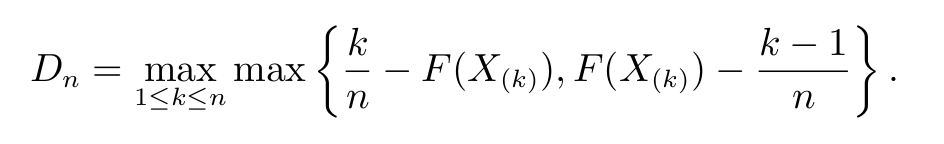

По теореме *Гливенко-Кантелли* последовательность $\{D_n\} \overset{п.н.}{\longrightarrow} 0$.

In [18]:
def plot_Dn(D):
  fig, ax = plt.subplots(figsize=(20, 10))
  ax.plot(D, label='D_n')

  ax.set_title(f'Зависимость D_n от n')
  ax.set_xlabel('n')
  ax.set_ylabel('D_n')
  plt.legend()

  ax.grid(True)


def calc_Dn(X):
  X.sort()

  D_n = 0
  for k in range(1, len(X) + 1):
    D_n = max(
        D_n,
        max(
          k / len(X) - stats.norm.cdf(X[k - 1]),
          stats.norm.cdf(X[k - 1]) - (k - 1) / len(X)
        )
    )

  return D_n


def calc_and_plot_Dn():
  X = stats.norm.rvs(size=1000)
  D = [calc_Dn(X[:n + 1]) for n in range(len(X))]
  plot_Dn(D)

  return D

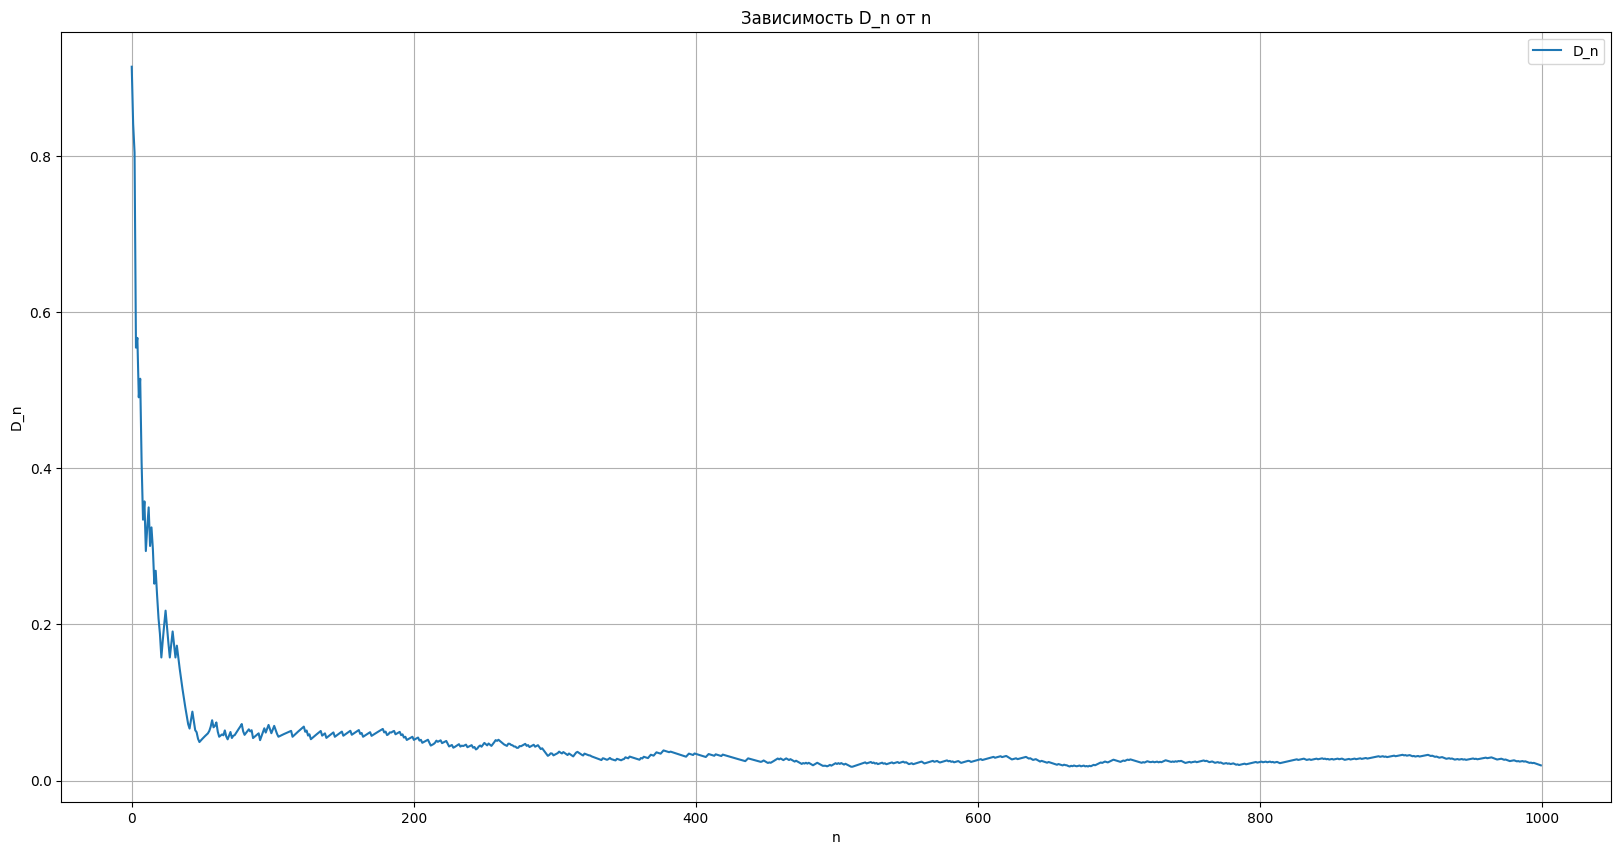

In [19]:
sample_D = calc_and_plot_Dn()

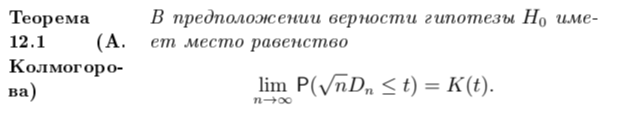

In [20]:
from scipy.special import kolmogorov

def plot_P(X, probabilities):
  fig, ax = plt.subplots(figsize=(8, 8))

  ax.plot(X, probabilities, label='P(sqrt(n)D_n <= x)')
  ax.plot(X, [1 - kolmogorov(x) for x in X], label='K(x)')
  ax.set_xlabel('Absolute deviation between the ECDF and the CDF, multiplied by sqrt(n)')
  plt.legend()


def plot_P_and_Kolmogorov(sample):
  X = np.linspace(-1, 10, 100)
  sample = [sqrt(n) * sample[n - 1] for n in range(1, len(sample) + 1)]

  probabilities = []
  for x in X:
    result = 0
    for elem in sample:
      result += int(elem <= x)

    probabilities.append(result / len(sample))

  plot_P(X, probabilities)

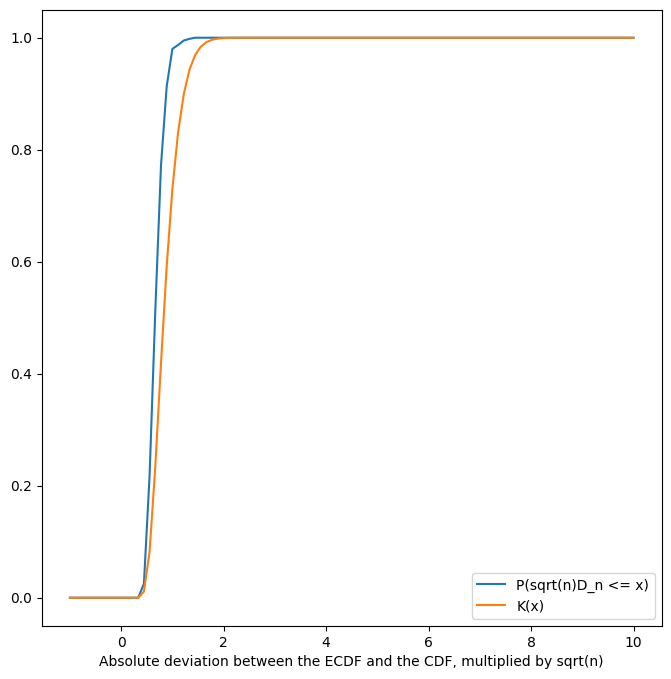

In [21]:
plot_P_and_Kolmogorov(sample_D)

Основываясь на графике, можно сделать вывод, что функция K(x) является функцией распределения.

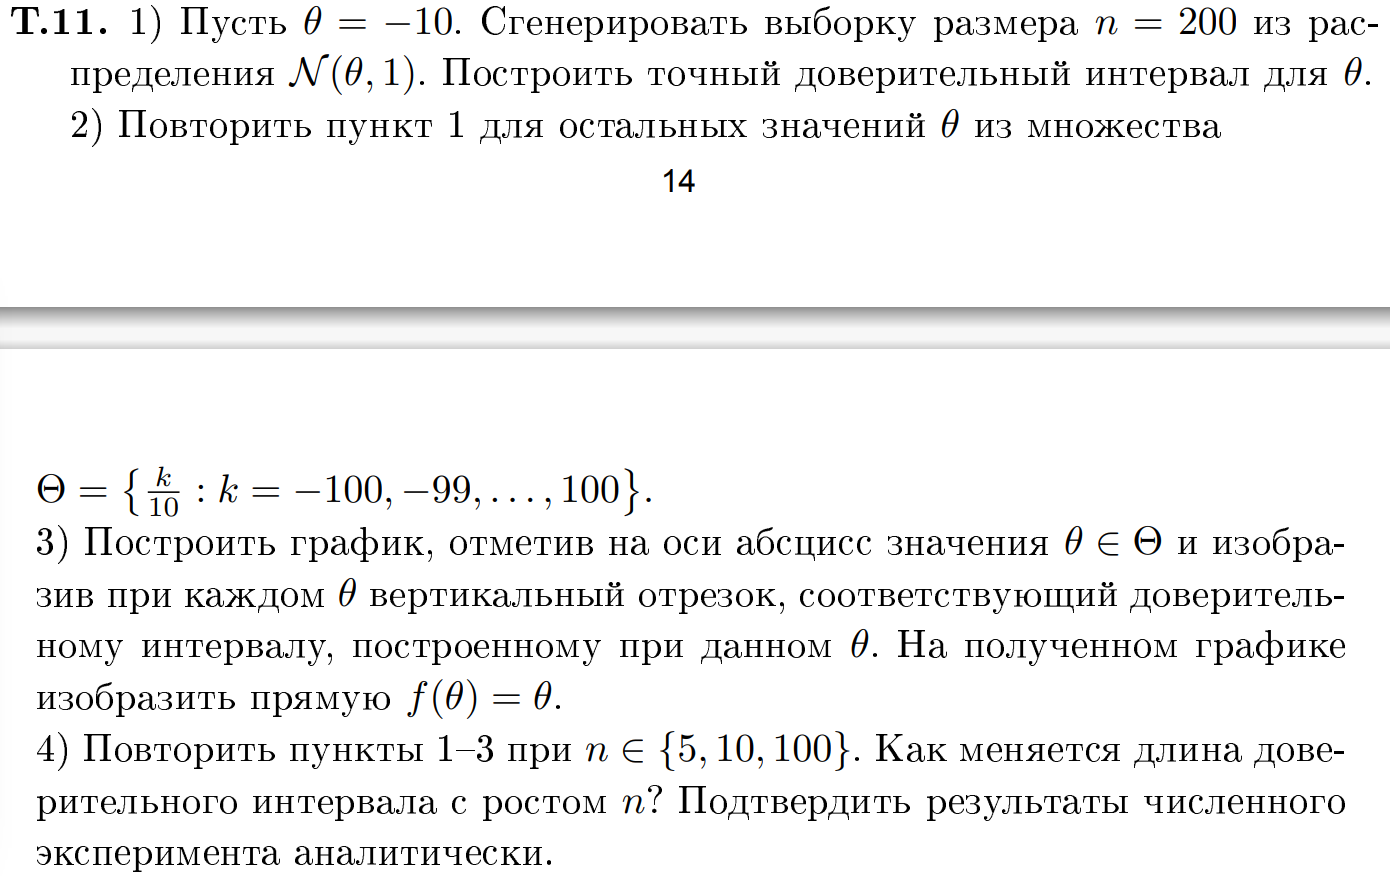

# Общий принцип построения точного доверительного интервала

1.   Найти функцию $G(\overset{\rightarrow}{X},\theta)$, слабо сходящуюся к распределению, не зависящему от параметра $\theta$. Необходимо, чтобы $G(\overset{\rightarrow}{X},\theta)$ была обратима по $\theta$ при любом фиксированном $\overline{X}$.
2. Найти числа $q_1$ и $q_2$ — квантили нового распределения, для которых \\
$\:\:\: P(q_1 < G(\overset{\rightarrow}{X},\theta) < q_2) = 1 - \varepsilon$
3. Разрешить неравенство $q_1 < G(\overset{\rightarrow}{X},\theta) < q_2$ относительно $\theta$.

# Построение точного доверительного интервала для $\theta$ параметра $\mathcal{N}(\theta, 1)$

Центрируем и нормируем случайную величину разности оценки и параметра:

$\sqrt{n} \frac{\overline{X_n} - \theta}{\sigma}$ ~ $\mathcal{N}(0, 1)$ - центральная статистика

Пусть для $t_{1 - \frac{\alpha}{2}}$ верно, что $\Phi(t_{1 - \frac{\alpha}{2}}) = 1 - \frac{\alpha}{2}, тогда$

$\mathbb{P_{\overline{X}}} \left(-t_{1 - \frac{\alpha}{2}} \leq \sqrt{n} \frac{\overline{X_n} - \theta}{\sigma} \leq t_{1 - \frac{\alpha}{2}} \right) = 1 - \alpha \iff \mathbb{P_{\overline{X}}} \left( \overline{X_n} - \frac{t_{1 - \frac{\alpha}{2}} \sigma}{\sqrt{n}} \leq \theta \leq \overline{X_n} + \frac{t_{1 - \frac{\alpha}{2}} \sigma}{\sqrt{n}} \right) = 1 - \alpha$

Легко заметить, что при росте $n$ длина доверительного интервала будет уменьшаться.

In [22]:
from abc import ABC, abstractmethod

class ConfidenceIntervalBuilder(ABC):
  @abstractmethod
  def __call__(self, Sample : list[float]):
    pass

In [23]:
class StandardNormalDistBuilder(ConfidenceIntervalBuilder):
  def __call__(self, alpha, sample : list[float]):
    sample_sz = len(sample)

    sample_mean = np.mean(sample)
    t = stats.norm.ppf(1 - (alpha / 2))

    lower_bound = sample_mean - (t / sqrt(sample_sz))
    upper_bound = sample_mean + (t / sqrt(sample_sz))

    return (lower_bound, upper_bound)

In [24]:
from math import inf

def plot_confidence_intervals(thetas, sample_sz):
  fig, ax = plt.subplots(figsize=(20, 10))

  mn_theta, mx_theta = inf, -inf

  for entry in thetas:
    theta = entry["param"]
    lower = entry["borders"][0]
    upper = entry["borders"][1]

    ax.plot([theta, theta], [lower, upper], color='red')
    #ax.scatter(theta, theta, color='blue', s=1)

    mn_theta = min(mn_theta, theta)
    mx_theta = max(mx_theta, theta)

  ax.plot([mn_theta, mx_theta], [mn_theta, mx_theta], color='green', linestyle='--')

  ax.set_xlabel('theta')
  ax.set_ylabel('interval')
  ax.set_title(f'Доверительные интервалы для параметров theta (Размер выборки: {sample_sz})')
  ax.grid(True)

  plt.show()


def generate_theta(limits, step=1, coef=0.1):
  low, high = limits
  for k in range(low, high, step):
    yield (k * coef)


def build_confidence_interval(dist, limits, sample_sz, builder, alpha=0.05):
  thetas = []

  for theta in generate_theta(limits):
    sample = dist.rvs(theta, size=sample_sz)

    lower_bound, upper_bound = builder(alpha, sample)

    thetas.append({"param" : theta, "borders" : (lower_bound, upper_bound)})

  plot_confidence_intervals(thetas, sample_sz)


def research_confidence_interval_lengths(dist, limits, sample_sizes, builder):
  for n in sample_sizes:
    build_confidence_interval(dist=dist, limits=limits, sample_sz=n, builder=builder)

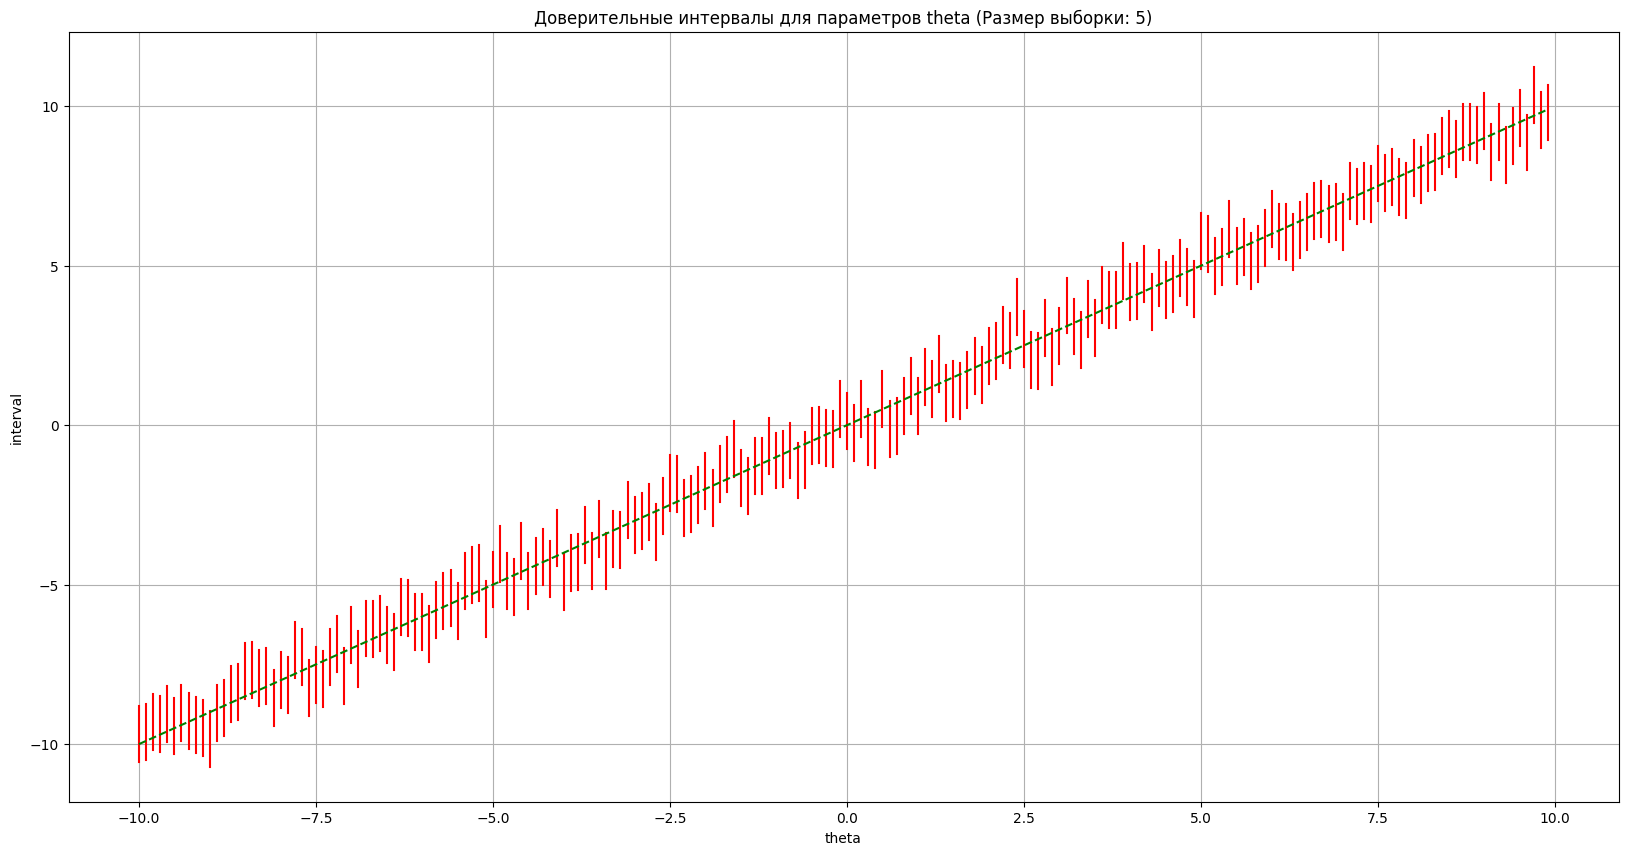

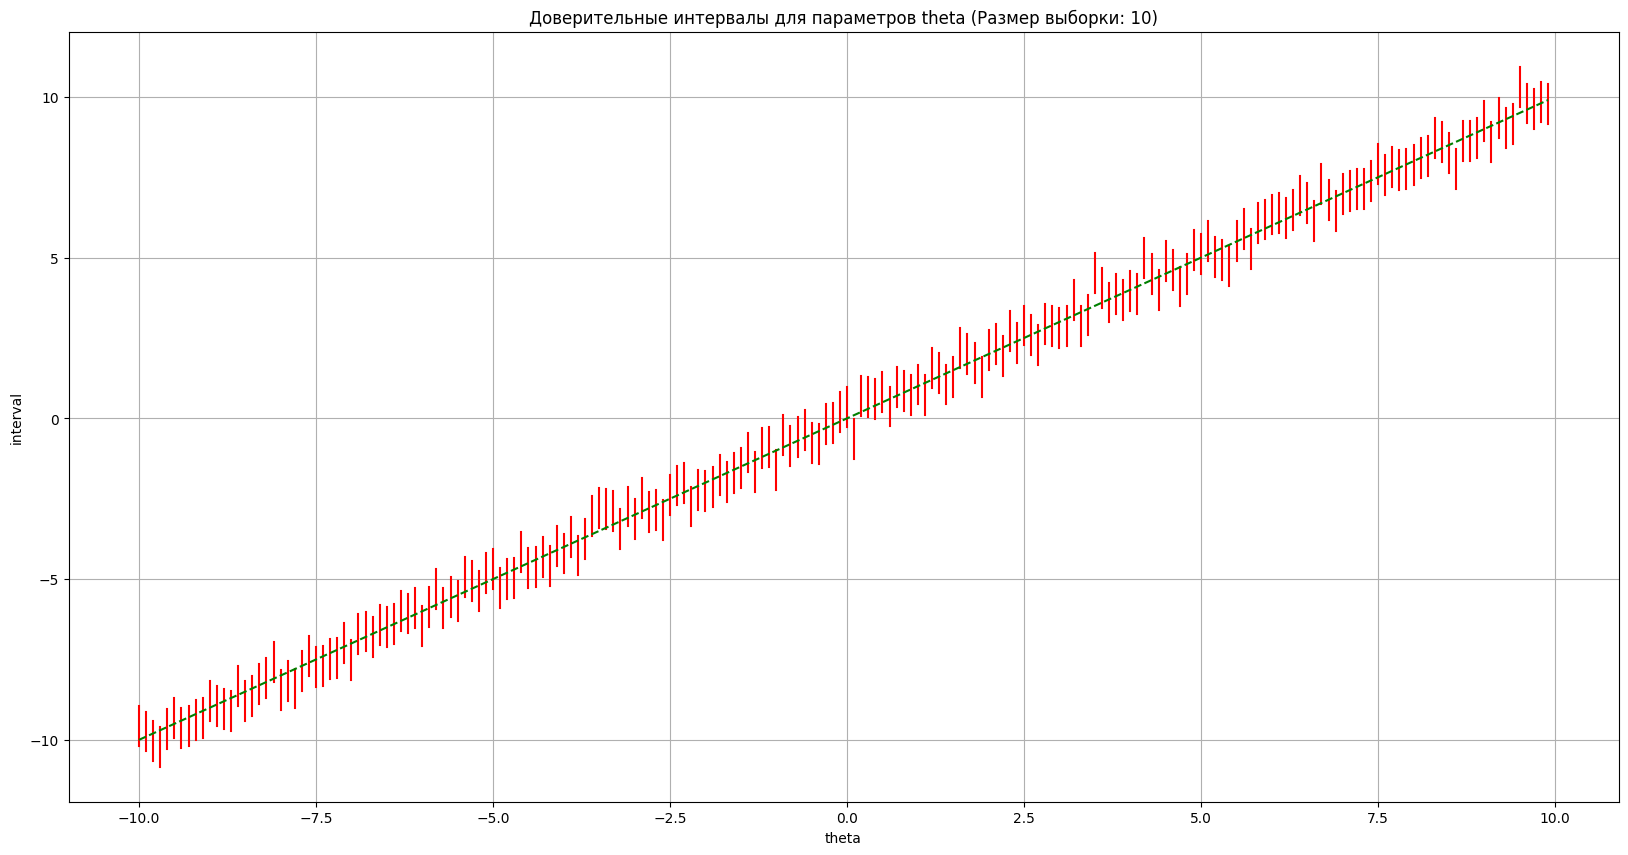

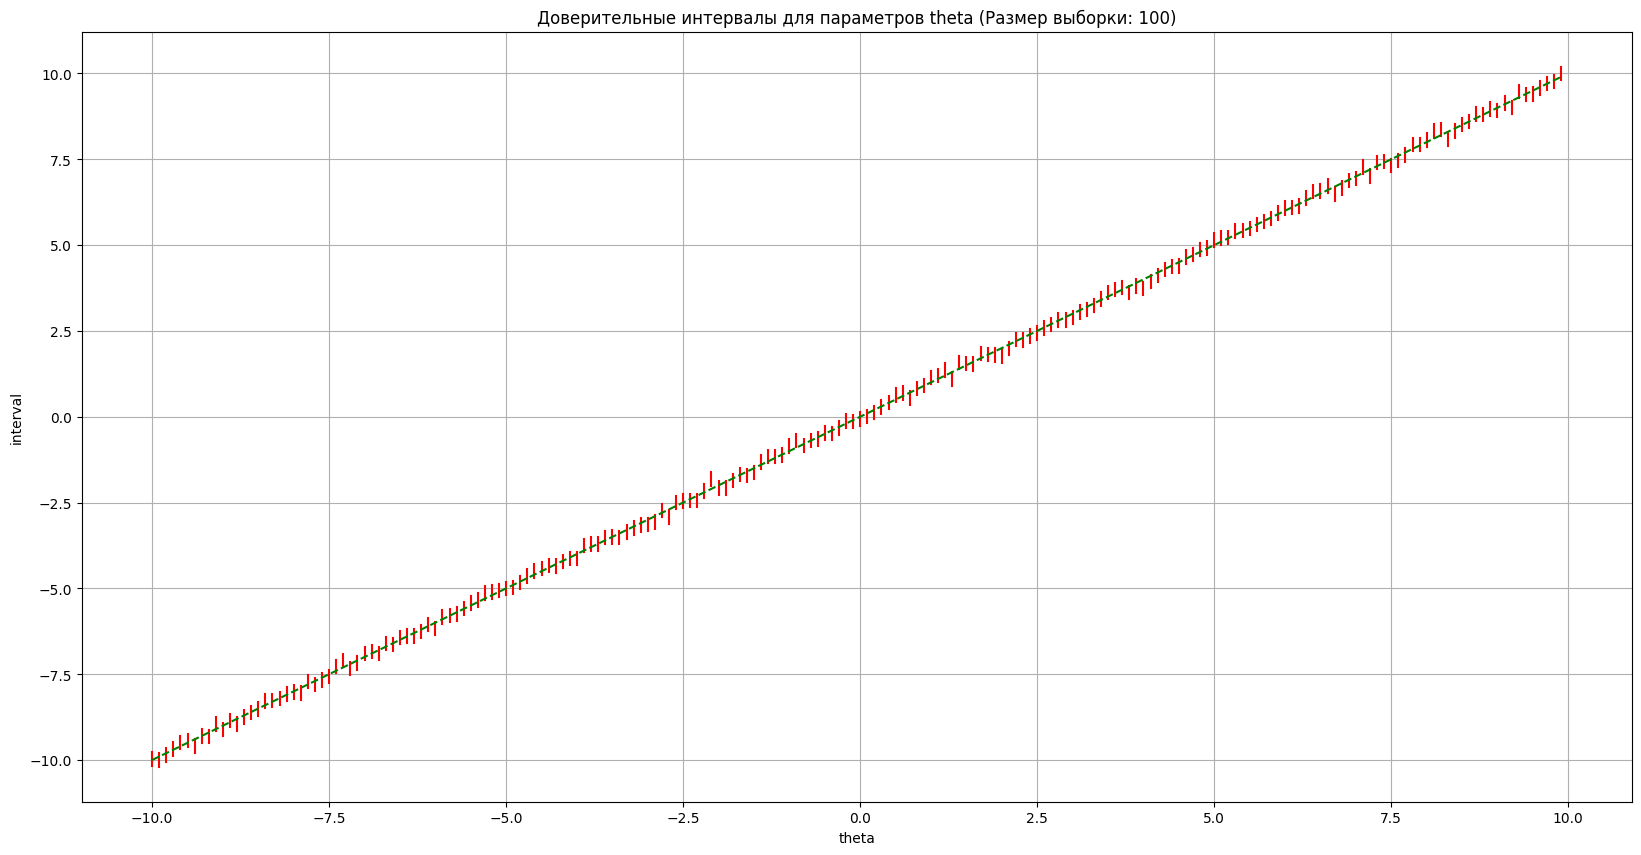

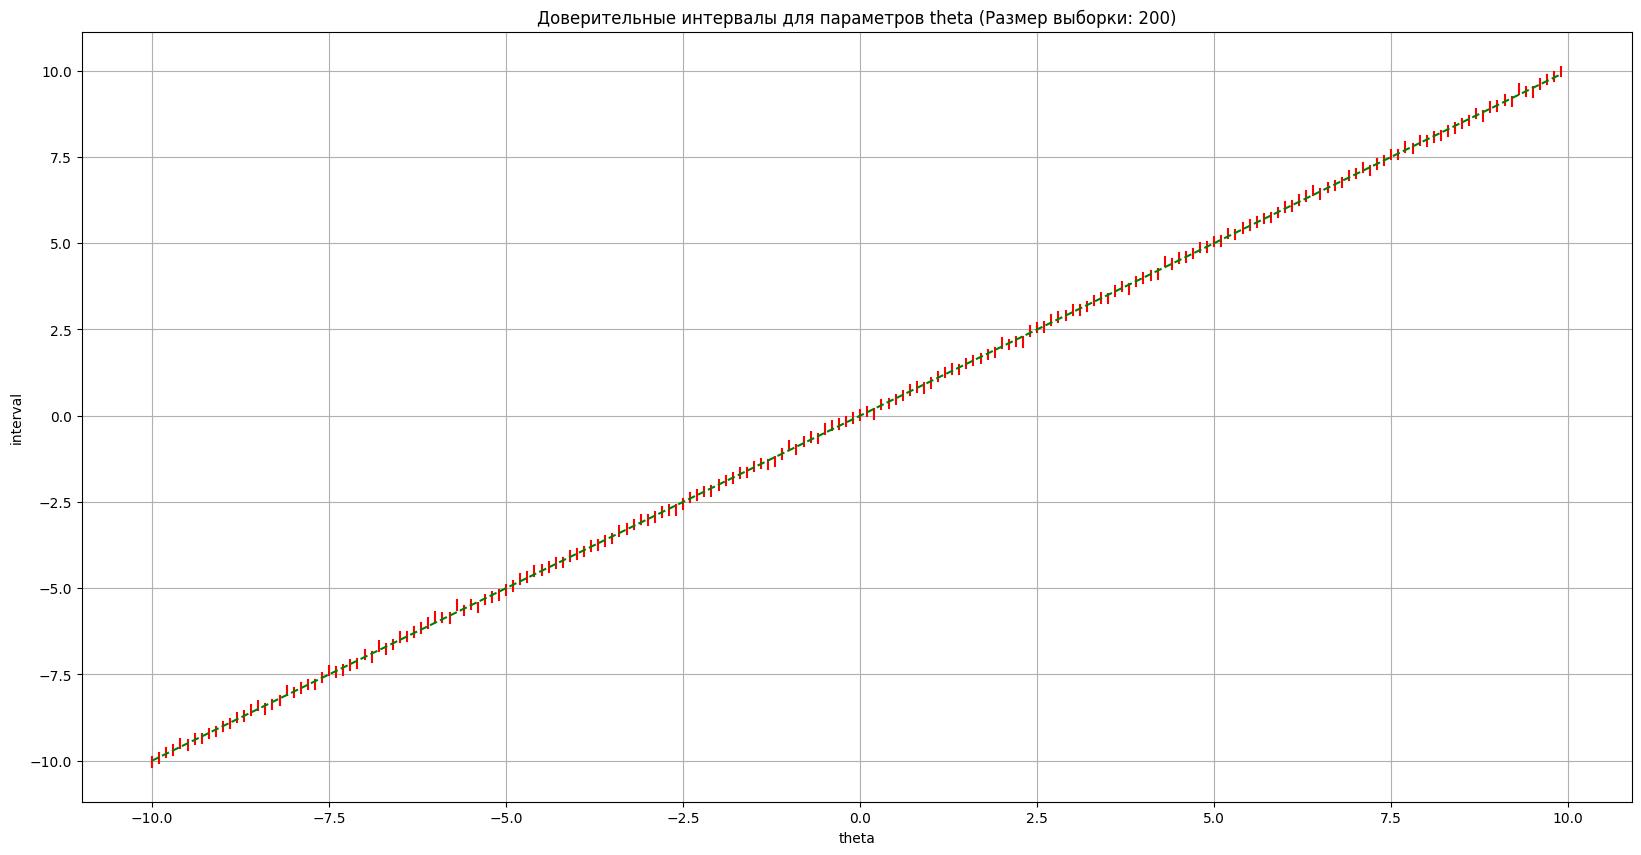

In [25]:
research_confidence_interval_lengths(stats.norm,
                                     limits=(-100, 100),
                                     sample_sizes=(5, 10, 100, 200),
                                     builder=StandardNormalDistBuilder())

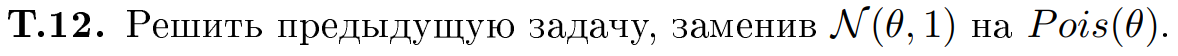

# Теоретическое дополнение

## Точный интервал

Поскольку распределение Пуассона является дискретным распределением, трудно построить доверительные интервалы для $\theta$ с точно заданным коэффициентом достоверности, равным, скажем, 100(1 - $\alpha$)%.

Приблизительные доверительные пределы в 100(1 - $\alpha$)% для заданного наблюдаемого значения $x$ из *X*, где *X* имеет распределение $\frac{e^{-\theta} \theta^x}{x!}$, получены путем решения уравнений:

$exp(-{\theta_L}) \sum_{j=x}^{\infty} \frac{\theta_L^j}{j!}=\frac{\alpha}{2}$
$\:\:\:\:$
$exp(-{\theta_U}) \sum_{j=0}^{x} \frac{\theta_U^j}{j!}=\frac{\alpha}{2}$

для $\theta_L$, $\theta_U$, соответственно, и с использованием интервала ($\theta_L$, $\theta_U$).

Исходя из соотношения между распределениями Пуассона и $\chi^2$, эти уравнения можно записать в виде:

$\theta_L = 0.5 \chi^2_{2x, \frac{\alpha}{2}}$
$\:\:\:\:$
$\theta_R = 0.5 \chi^2_{2(x + 1), 1 - \frac{\alpha}{2}}$

Таким образом, значения $\theta_L$, $\theta_U$ можно найти путем интерполяции (по числу степеней свободы) в таблицах процентных пунктов центрального распределения $\chi^2$

## Асимптотический интервал (уровня доверия 1 - $\varepsilon$)

### Общий принцип

1.   Найти функцию $G(\overset{\rightarrow}{X},\theta)$, слабо сходящуюся к распределению, не зависящему от параметра $\theta$. Необходимо, чтобы $G(\overset{\rightarrow}{X},\theta)$ была обратима по $\theta$ при любом фиксированном $\overline{X}$.
2. Найти числа $q_1$ и $q_2$ — квантили нового распределения, для которых \\
$\:\:\: P(q_1 < G(\overset{\rightarrow}{X},\theta) < q_2) \longrightarrow P(q_1 < η < q_2) = 1 - \varepsilon$, где $\mu$ сл. в. принадлежащая новому распределению.
3. Разрешить неравенство $q_1 < G(\overset{\rightarrow}{X},\theta) < q_2$ относительно $\theta$.

### Вывод для параметра распределения Пуассона

По ЦПТ: $G(\overset{→}{X}, \lambda) = \sqrt{n} \frac{\overline{X} - \lambda}{\sqrt{\lambda}}$

Пусть q - квантиль уровня 1 - $\varepsilon$ стандартного нормального распределения.

$\mathbb{P_{\overline{X}}}(-q < \sqrt{n} \frac{\overline{X} - \lambda}{\lambda} < q) = 1 - \varepsilon$

Оценка $\theta = \overline{X}$ состоятельна, поэтому $\sqrt{\frac{\lambda}{\overline{X}}} \overset{\mathbb{P}}{\longrightarrow} 1$

$\mathbb{P}(-q < \sqrt{n} \frac{\overline{X} - \lambda}{\overline{X}} < q) = \mathbb{P}(\overline{X} - q \frac{\overline{X}}{\sqrt{n}} < \lambda < \overline{X} + q \frac{\overline{X}}{\sqrt{n}})$

Итоговый интервал $\left(\overline{X} - q \frac{\overline{X}}{\sqrt{n}}, \overline{X} + q \frac{\overline{X}}{\sqrt{n}} \right)$


In [26]:
from scipy.stats import chi2

class PoissonDistBuilder(ConfidenceIntervalBuilder):
  def __call__(self, alpha, sample : list[float], **kwargs):
    k = sum(sample)

    lower_bound = chi2.ppf(alpha / 2, 2 * k) / (2 * len(sample))
    upper_bound = chi2.ppf(1 - alpha / 2, 2 * (k + 1)) / (2 * len(sample))

    return (lower_bound, upper_bound)

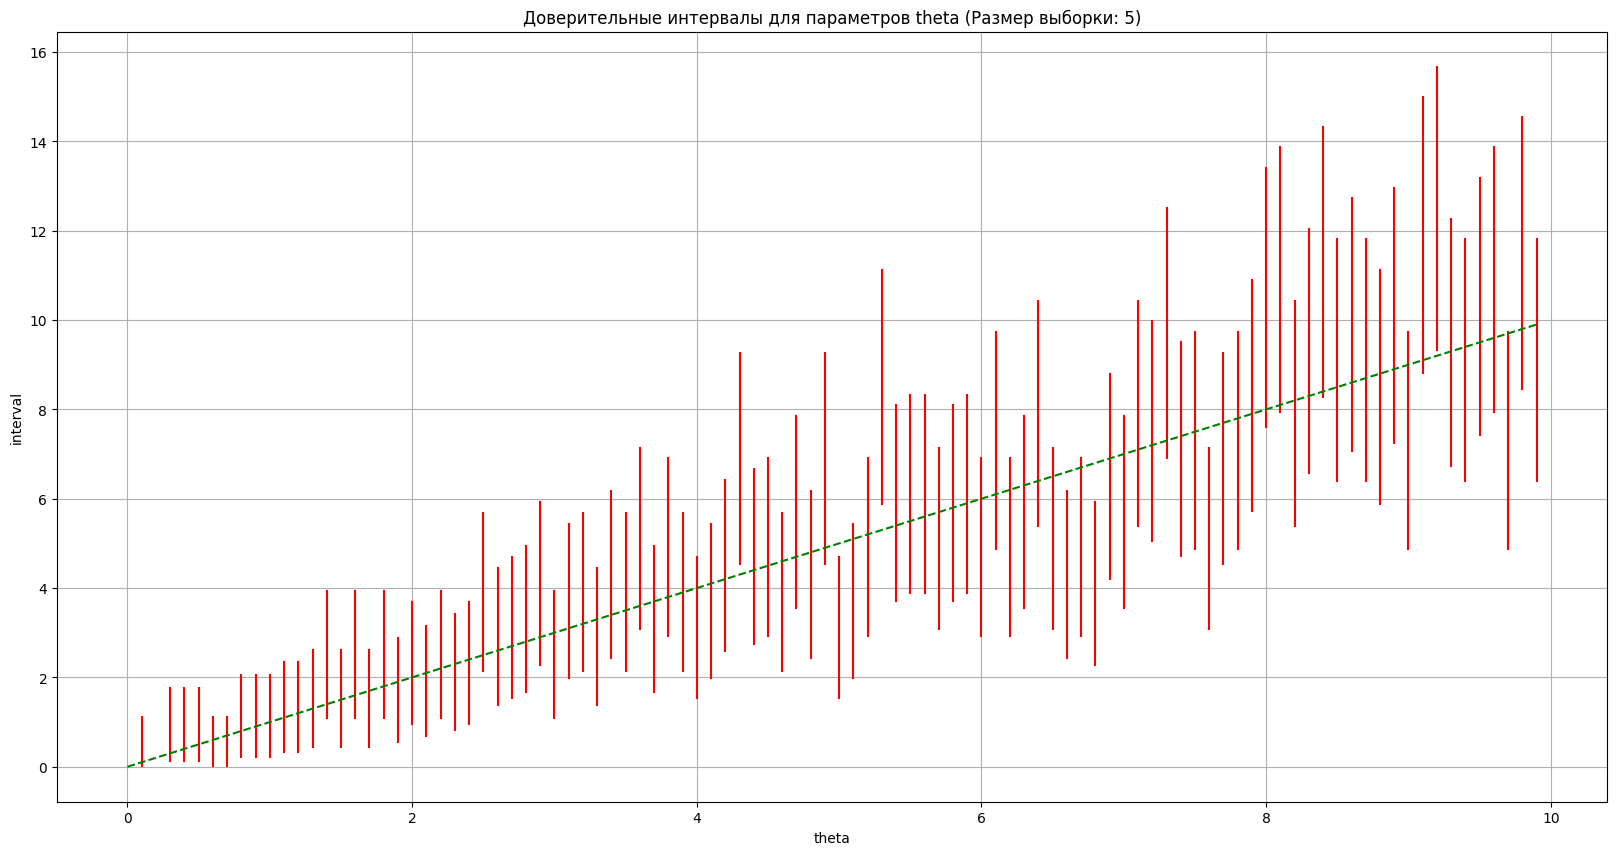

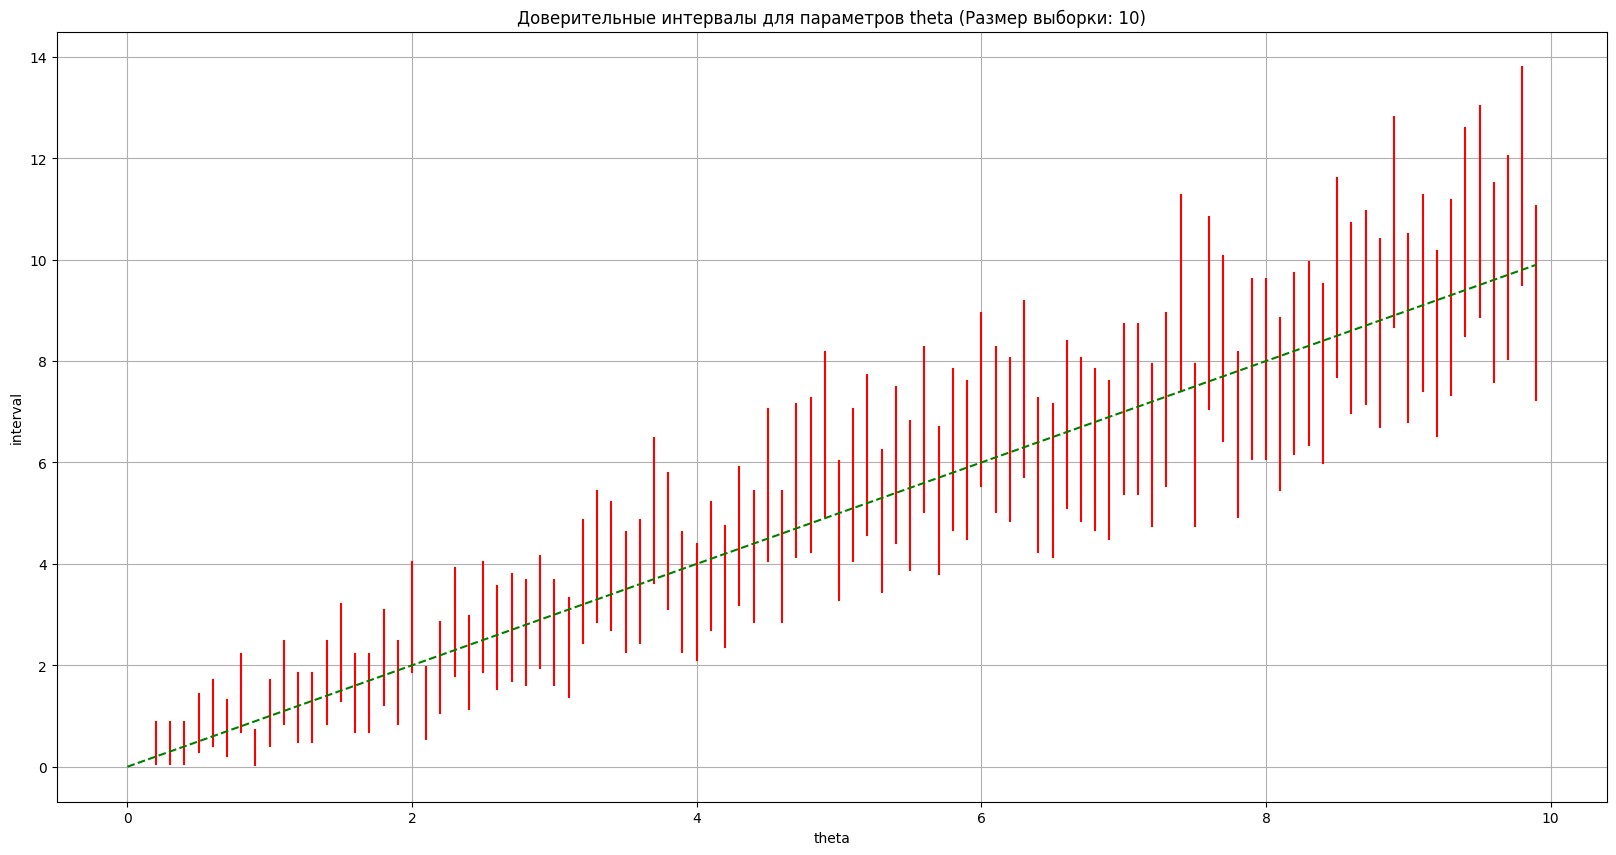

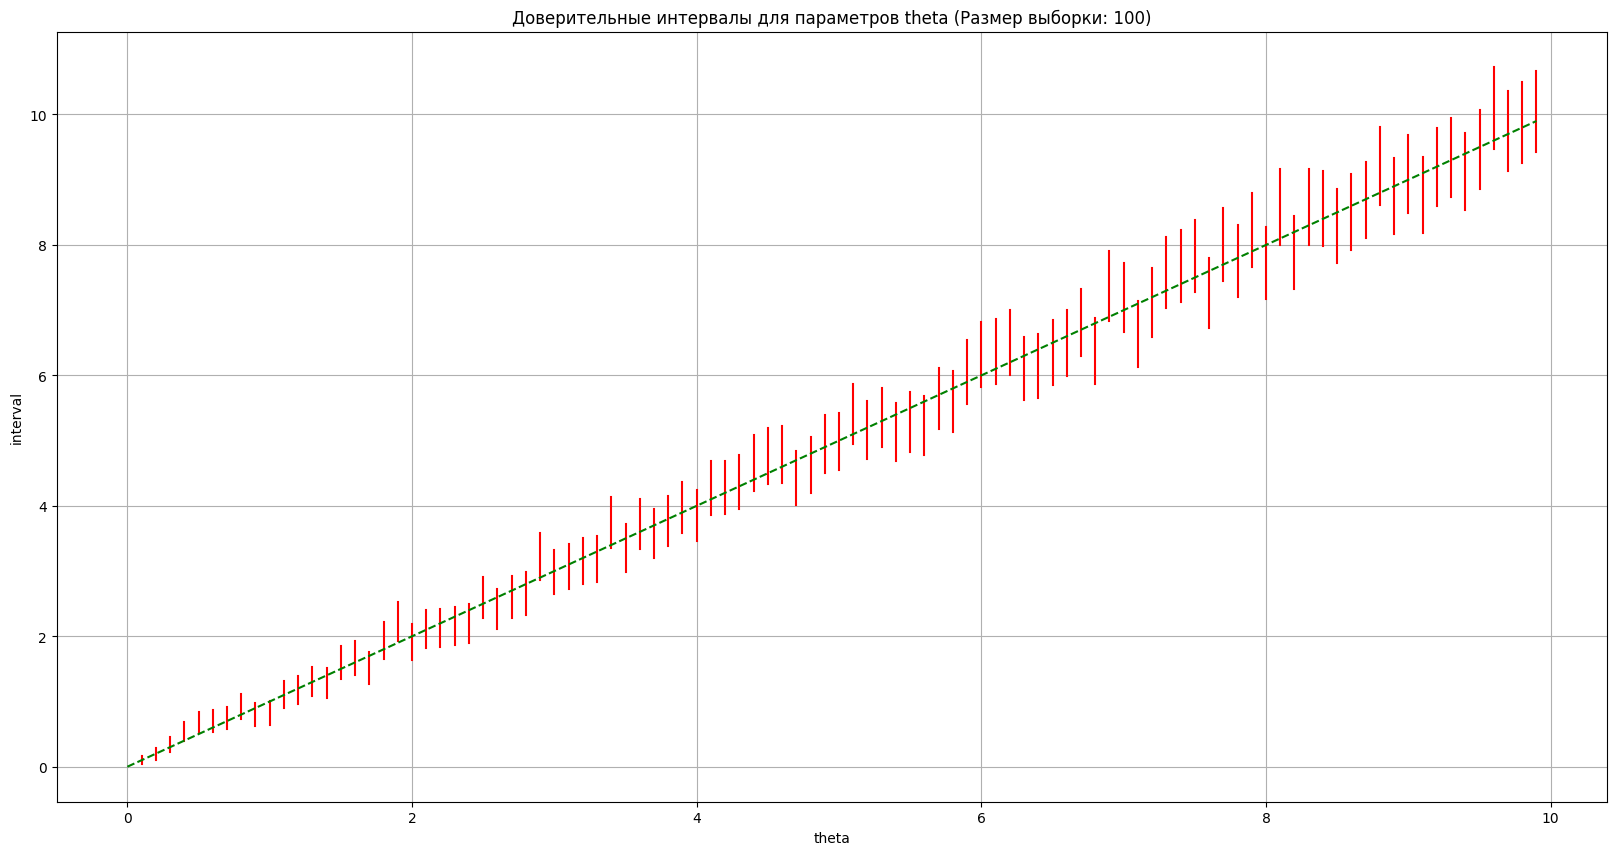

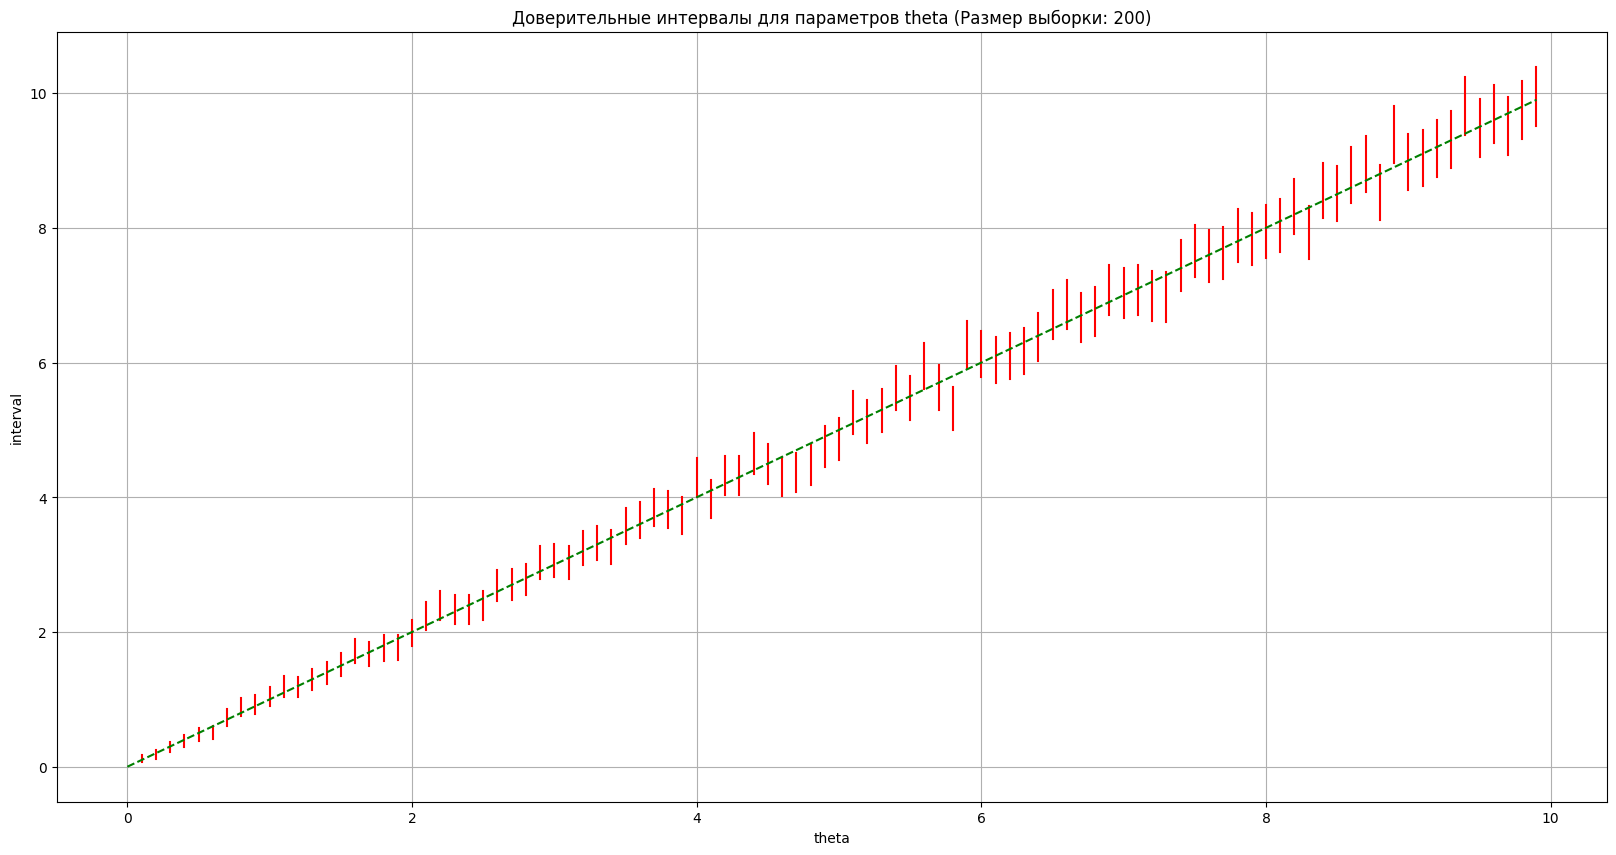

In [27]:
research_confidence_interval_lengths(stats.poisson,
                                     limits=(0, 100),
                                     sample_sizes=(5, 10, 100, 200),
                                     builder=PoissonDistBuilder())



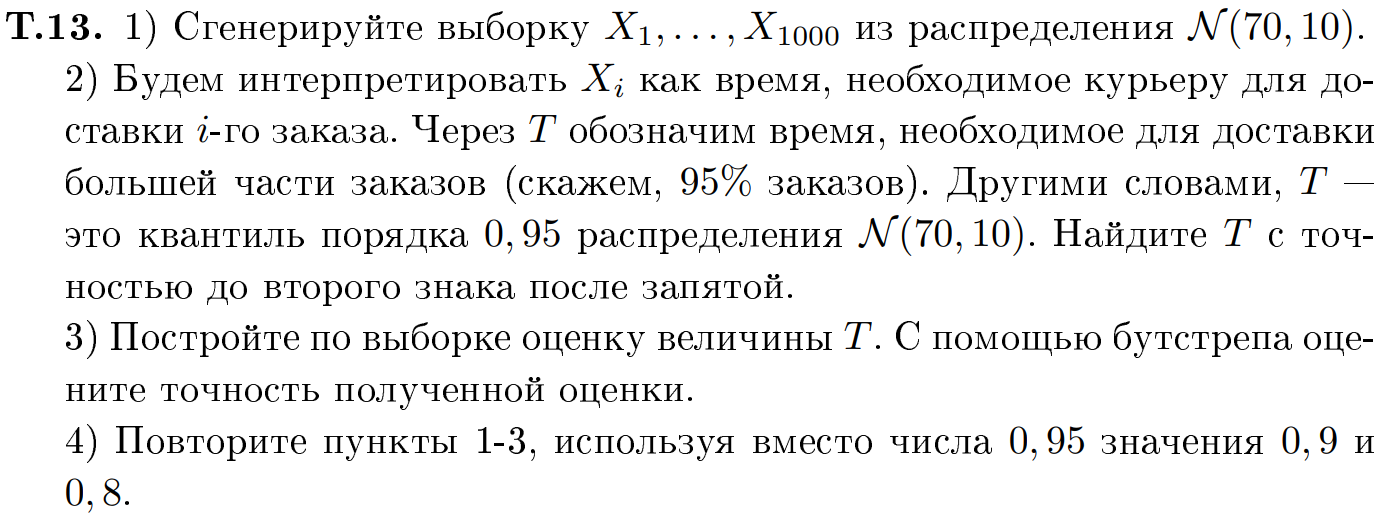

# Теоретическое дополнение

Мы хотим оценить стандартное отклонение произвольной статистики, а конкретно в задаче n% квантиля.

Хочется уметь получать выборки из того же, распределения, что и наша, чтобы на них посчитать статистику, а потом оценить std.

Истинного распределения мы не знаем, но можем его оценить по имеющимся данным с помощью ЭФР(упоминалась в Т10).

Сгенерировать подвыборку размера n из ЭФР - это тоже самое, что выбрать случайно с возвращением n элементов из исходной.

**Важно!**

Чтобы оценка стандартного отклонения была *несмещённой*, необходимо генерировать выборки такого же размера, как и размер исходной выборки.

In [28]:
def bootstrap(sample, q, size, precision_iters=1000):
  bootstrap_quantiles = []
  for _ in range(precision_iters):
    bootstrap_values = rng.choice(sample, size=size, replace=True)
    bootstrap_quantiles.append(np.quantile(bootstrap_values, q))

  return np.std(bootstrap_quantiles)


def estimate_quantiles(quantiles, dist_params, size=1000):
  for q in quantiles:
    sample = stats.norm.rvs(loc=dist_params["mean"], scale=dist_params["std"], size=size)

    T = stats.norm.ppf(q, loc=dist_params["mean"], scale=dist_params["std"])
    T = round(T, 2)
    est_T = np.quantile(sample, q)

    std = bootstrap(sample, q, size=size)

    print(f'Оценка {q} квантиля {T}: {est_T}')
    print(f'Оценка стандартного отклонения для {q} квантиля {T}: {std:0.2f}\n')

In [29]:
estimate_quantiles((0.95, 0.9, 0.8), {"mean" : 70, "std" : sqrt(10)})

Оценка 0.95 квантиля 75.2: 75.06495323393156
Оценка стандартного отклонения для 0.95 квантиля 75.2: 0.25

Оценка 0.9 квантиля 74.05: 74.33574775900615
Оценка стандартного отклонения для 0.9 квантиля 74.05: 0.22

Оценка 0.8 квантиля 72.66: 72.78142602974522
Оценка стандартного отклонения для 0.8 квантиля 72.66: 0.14

